In [498]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt 
import lightgbm as lgb
import catboost as c
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import KFold

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 120)

cat = CatBoostRegressor()
lg = LGBMRegressor()

SEED = 400
import random
random.seed(SEED)
np.random.seed(SEED)

In [499]:
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')
meta = pd.read_csv('data/metadata.csv')
ss = pd.read_csv('data/SampleSubmission.csv')
var = pd.read_csv('data/VariablesDefinition.txt')

In [500]:
train.head()

,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6
0,ID_P6IMAB9,"['5-2021', '4-2021', '5-2019', '6-2019', '12-2018', '11-2018', '3-2020', '9-2018', '4-2018', '2-2020', '4-2019', '1-2019', '8-2018', '3-2019', '2-2019', '10-2018', '5-2018', '8-2019', '7-2019', '7-2018', '11-2019', '9-2020']","[55.0, 110.0, 240.0, 900.0, 1330.0, 1190.0, 160.0, 1570.0, 2000.0, 170.0, 235.0, 1505.0, 200.0, 1075.0, 715.0, 550.0, 1405.0, 120.0, 180.0, 1365.0, 55.0, 55.0]",110.0,1650.0,1500.0,50.0,165.0,3000.0
1,ID_AF1HPAT,"['11-2017', '10-2017', '8-2018', '3-2018', '4-2018', '2-2018', '1-2018', '11-2018']","[1120.0, 3120.0, 1200.0, 880.0, 1360.0, 880.0, 1200.0, 240.0]",1120.0,1240.0,1360.0,760.0,560.0,1520.0
2,ID_12K3MTU,"['5-2021', '2-2021', '3-2021', '4-2021', '2-2019', '11-2020', '12-2019', '8-2019', '7-2019', '4-2020', '9-2020', '6-2020', '12-2020', '5-2019', '8-2020', '1-2021', '1-2019', '6-2019', '11-2019', '2-2020', '7-2020', '1-2020', '9-2019', '5-2020', '10-2019', '10-2020', '3-2020', '3-2019', '4-2018', '8-2018', '11-2018', '2-2018', '5-2018', '7-2018']","[460.0, 440.0, 650.0, 165.0, 1425.0, 330.0, 330.0, 550.0, 550.0, 660.0, 495.0, 330.0, 440.0, 605.0, 275.0, 110.0, 1435.0, 605.0, 220.0, 220.0, 55.0, 275.0, 220.0, 440.0, 685.0, 385.0, 110.0, 1600.0, 660.0, 440.0, 1080.0, 955.0, 660.0, 330.0]",1005.0,165.0,165.0,375.0,3000.0,165.0
3,ID_KIAESLK,"['6-2018', '4-2019', '6-2019', '3-2019', '7-2018', '7-2019', '4-2018', '8-2018', '9-2019', '5-2018', '2-2019', '9-2018', '11-2019', '11-2018', '10-2018', '12-2018']","[1375.0, 1540.0, 1455.0, 1540.0, 1434.0, 1540.0, 1485.0, 1430.0, 660.0, 1485.0, 1265.0, 1265.0, 1430.0, 1375.0, 1430.0, 1485.0]",1540.0,1430.0,851.0,1595.0,1320.0,4154.0
4,ID_SGM2MXY,"['3-2018', '12-2020', '4-2020', '3-2020', '6-2020', '4-2018', '8-2020', '4-2019', '5-2019', '10-2020', '11-2020', '9-2020', '5-2020', '2-2020', '7-2020', '6-2018', '5-2018', '12-2018', '3-2019', '11-2018', '9-2018', '2-2019', '1-2019', '1-2020', '2-2018', '6-2019', '8-2018', '8-2019', '7-2019']","[1420.0, 1618.0, 1522.0, 1125.0, 1043.0, 1405.0, 1265.0, 480.0, 635.0, 1565.0, 1445.0, 1585.0, 1312.0, 1110.0, 990.0, 2330.0, 1555.0, 740.0, 749.0, 1086.0, 160.0, 763.0, 593.0, 995.0, 3295.0, 270.0, 165.0, 230.0, 285.0]",550.0,288.0,100.0,190.0,100.0,120.0


In [501]:
test.head()

,ID,TransactionDates,PaymentsHistory
0,ID_ECQME2K,"['11-2018', '9-2018', '6-2018', '12-2017', '8-2018', '5-2018', '7-2018', '3-2018', '2-2018', '12-2018']","[720.0, 840.0, 880.0, 1100.0, 840.0, 1040.0, 840.0, 1200.0, 840.0, 580.0]"
1,ID_2TE361R,"['5-2021', '2-2021', '3-2021', '4-2021', '1-2021', '12-2020', '8-2020', '3-2020', '11-2020', '2-2020']","[450.0, 130.0, 310.0, 500.0, 480.0, 970.0, 500.0, 1160.0, 150.0, 4000.0]"
2,ID_HKURNJL,"['5-2021', '2-2021', '3-2021', '4-2021', '1-2021', '5-2019', '1-2019', '11-2018', '7-2019', '4-2020', '4-2019', '9-2019', '9-2020', '6-2018', '5-2020', '6-2020', '7-2020', '3-2019', '3-2020', '8-2019', '10-2018', '8-2020', '7-2018', '8-2018', '1-2020', '10-2019', '9-2018', '12-2019', '5-2018', '6-2019', '2-2020', '11-2019']","[330.0, 165.0, 330.0, 220.0, 275.0, 1005.0, 1100.0, 935.0, 825.0, 715.0, 825.0, 770.0, 440.0, 1485.0, 660.0, 550.0, 550.0, 825.0, 825.0, 990.0, 935.0, 550.0, 1265.0, 1320.0, 880.0, 715.0, 990.0, 880.0, 1595.0, 825.0, 495.0, 660.0]"
3,ID_DGWMMDW,"['2-2021', '1-2021', '12-2020', '11-2020', '10-2020', '9-2020', '7-2020', '2-2020']","[800.0, 1040.0, 1080.0, 1080.0, 1040.0, 1040.0, 500.0, 920.0]"
4,ID_B7HBFMG,"['5-2021', '2-2021', '3-2021', '4-2021', '1-2021', '2-2020', '5-2020', '4-2020', '3-2020', '9-2020']","[255.0, 795.0, 730.0, 455.0, 340.0, 4225.0, 765.0, 1090.0, 2000.0, 685.0]"


In [502]:
meta.head()

,ID,RegistrationDate,Deposit,UpsellDate,AccessoryRate,PaymentMethod,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,Town,Occupation,SupplierName,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate
0,ID_ECQME2K,2017-09-14 09:37:03,2000,NaN,0.0,FINANCED,DAILY,40,7,Female,34.0,Western,Bungoma,Farmer,d_light,364,16560.0,2018-09-13 09:37:03,2017-09-14 09:37:03,2018-12-30 09:20:00
1,ID_3CU8FA2,2020-01-10 13:01:49,2000,NaN,0.0,FINANCED,DAILY,40,3,Male,31.0,Nyanza,Kisumu,Driver/Motorbike Rider,d_light,270,12800.0,2020-10-06 13:01:49,2020-01-10 13:01:57,2021-05-05 10:25:15
2,ID_GQ0UY5S,2020-01-04 09:47:30,2000,NaN,0.0,FINANCED,DAILY,40,3,Male,42.0,Coast Region,Kilifi,Driver/Motorbike Rider,d_light,270,12800.0,2020-09-30 09:47:30,2020-01-04 09:47:38,2020-12-13 12:59:17
3,ID_8K4M1PP,2017-08-21 10:29:35,2000,NaN,0.0,FINANCED,DAILY,40,7,Male,31.0,Nyanza,Homa Bay,Labourer,d_light,364,16560.0,2018-08-20 10:29:35,2017-08-21 10:29:37,2019-03-11 15:17:21
4,ID_T3ANBPN,2018-02-14 16:49:43,2999,NaN,0.0,FINANCED,DAILY,55,3,Male,44.0,South Rift,Narok,Business,d_light,547,33084.0,2019-08-15 16:49:43,2018-02-14 16:50:02,2021-05-22 16:17:33


In [503]:
var.head()

,Contract file:
0,ID: Unique contract id
1,RegistrationDate: Registration Date
2,Deposit: amount paid upfront by customer
3,Upsell Date: if upsell date of the upsell
4,Accessory rate: Rate per Unit for an Upsell


In [504]:
ss.head(7)

,ID,Target
0,ID_ECQME2K x m1,0.0
1,ID_ECQME2K x m2,0.0
2,ID_ECQME2K x m3,0.0
3,ID_ECQME2K x m4,0.0
4,ID_ECQME2K x m5,0.0
5,ID_ECQME2K x m6,0.0
6,ID_2TE361R x m1,0.0


In [505]:
train.shape, test.shape, meta.shape, ss.shape

((2250, 9), (750, 3), (3000, 20), (4500, 2))

In [506]:
train['source']= 'train'
test['source'] = 'test'
all_data = pd.concat((train, test)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (3000, 10)


In [507]:
all_data.head()

,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6,source
0,ID_P6IMAB9,"['5-2021', '4-2021', '5-2019', '6-2019', '12-2018', '11-2018', '3-2020', '9-2018', '4-2018', '2-2020', '4-2019', '1-2019', '8-2018', '3-2019', '2-2019', '10-2018', '5-2018', '8-2019', '7-2019', '7-2018', '11-2019', '9-2020']","[55.0, 110.0, 240.0, 900.0, 1330.0, 1190.0, 160.0, 1570.0, 2000.0, 170.0, 235.0, 1505.0, 200.0, 1075.0, 715.0, 550.0, 1405.0, 120.0, 180.0, 1365.0, 55.0, 55.0]",110.0,1650.0,1500.0,50.0,165.0,3000.0,train
1,ID_AF1HPAT,"['11-2017', '10-2017', '8-2018', '3-2018', '4-2018', '2-2018', '1-2018', '11-2018']","[1120.0, 3120.0, 1200.0, 880.0, 1360.0, 880.0, 1200.0, 240.0]",1120.0,1240.0,1360.0,760.0,560.0,1520.0,train
2,ID_12K3MTU,"['5-2021', '2-2021', '3-2021', '4-2021', '2-2019', '11-2020', '12-2019', '8-2019', '7-2019', '4-2020', '9-2020', '6-2020', '12-2020', '5-2019', '8-2020', '1-2021', '1-2019', '6-2019', '11-2019', '2-2020', '7-2020', '1-2020', '9-2019', '5-2020', '10-2019', '10-2020', '3-2020', '3-2019', '4-2018', '8-2018', '11-2018', '2-2018', '5-2018', '7-2018']","[460.0, 440.0, 650.0, 165.0, 1425.0, 330.0, 330.0, 550.0, 550.0, 660.0, 495.0, 330.0, 440.0, 605.0, 275.0, 110.0, 1435.0, 605.0, 220.0, 220.0, 55.0, 275.0, 220.0, 440.0, 685.0, 385.0, 110.0, 1600.0, 660.0, 440.0, 1080.0, 955.0, 660.0, 330.0]",1005.0,165.0,165.0,375.0,3000.0,165.0,train
3,ID_KIAESLK,"['6-2018', '4-2019', '6-2019', '3-2019', '7-2018', '7-2019', '4-2018', '8-2018', '9-2019', '5-2018', '2-2019', '9-2018', '11-2019', '11-2018', '10-2018', '12-2018']","[1375.0, 1540.0, 1455.0, 1540.0, 1434.0, 1540.0, 1485.0, 1430.0, 660.0, 1485.0, 1265.0, 1265.0, 1430.0, 1375.0, 1430.0, 1485.0]",1540.0,1430.0,851.0,1595.0,1320.0,4154.0,train
4,ID_SGM2MXY,"['3-2018', '12-2020', '4-2020', '3-2020', '6-2020', '4-2018', '8-2020', '4-2019', '5-2019', '10-2020', '11-2020', '9-2020', '5-2020', '2-2020', '7-2020', '6-2018', '5-2018', '12-2018', '3-2019', '11-2018', '9-2018', '2-2019', '1-2019', '1-2020', '2-2018', '6-2019', '8-2018', '8-2019', '7-2019']","[1420.0, 1618.0, 1522.0, 1125.0, 1043.0, 1405.0, 1265.0, 480.0, 635.0, 1565.0, 1445.0, 1585.0, 1312.0, 1110.0, 990.0, 2330.0, 1555.0, 740.0, 749.0, 1086.0, 160.0, 763.0, 593.0, 995.0, 3295.0, 270.0, 165.0, 230.0, 285.0]",550.0,288.0,100.0,190.0,100.0,120.0,train


In [508]:
def clean_alt_list(list_):
    list_ = list_.replace(', ', '","')
    list_ = list_.replace('[', '["')
    list_ = list_.replace(']', '"]')
    return list_

In [509]:
all_data['PaymentsHistory'] = all_data['PaymentsHistory'].apply(clean_alt_list)
all_data["PaymentsHistory"] = all_data["PaymentsHistory"].apply(eval)
pay = all_data["PaymentsHistory"].apply(pd.Series)

In [510]:
all_data.head()

,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6,source
0,ID_P6IMAB9,"['5-2021', '4-2021', '5-2019', '6-2019', '12-2018', '11-2018', '3-2020', '9-2018', '4-2018', '2-2020', '4-2019', '1-2019', '8-2018', '3-2019', '2-2019', '10-2018', '5-2018', '8-2019', '7-2019', '7-2018', '11-2019', '9-2020']","[55.0, 110.0, 240.0, 900.0, 1330.0, 1190.0, 160.0, 1570.0, 2000.0, 170.0, 235.0, 1505.0, 200.0, 1075.0, 715.0, 550.0, 1405.0, 120.0, 180.0, 1365.0, 55.0, 55.0]",110.0,1650.0,1500.0,50.0,165.0,3000.0,train
1,ID_AF1HPAT,"['11-2017', '10-2017', '8-2018', '3-2018', '4-2018', '2-2018', '1-2018', '11-2018']","[1120.0, 3120.0, 1200.0, 880.0, 1360.0, 880.0, 1200.0, 240.0]",1120.0,1240.0,1360.0,760.0,560.0,1520.0,train
2,ID_12K3MTU,"['5-2021', '2-2021', '3-2021', '4-2021', '2-2019', '11-2020', '12-2019', '8-2019', '7-2019', '4-2020', '9-2020', '6-2020', '12-2020', '5-2019', '8-2020', '1-2021', '1-2019', '6-2019', '11-2019', '2-2020', '7-2020', '1-2020', '9-2019', '5-2020', '10-2019', '10-2020', '3-2020', '3-2019', '4-2018', '8-2018', '11-2018', '2-2018', '5-2018', '7-2018']","[460.0, 440.0, 650.0, 165.0, 1425.0, 330.0, 330.0, 550.0, 550.0, 660.0, 495.0, 330.0, 440.0, 605.0, 275.0, 110.0, 1435.0, 605.0, 220.0, 220.0, 55.0, 275.0, 220.0, 440.0, 685.0, 385.0, 110.0, 1600.0, 660.0, 440.0, 1080.0, 955.0, 660.0, 330.0]",1005.0,165.0,165.0,375.0,3000.0,165.0,train
3,ID_KIAESLK,"['6-2018', '4-2019', '6-2019', '3-2019', '7-2018', '7-2019', '4-2018', '8-2018', '9-2019', '5-2018', '2-2019', '9-2018', '11-2019', '11-2018', '10-2018', '12-2018']","[1375.0, 1540.0, 1455.0, 1540.0, 1434.0, 1540.0, 1485.0, 1430.0, 660.0, 1485.0, 1265.0, 1265.0, 1430.0, 1375.0, 1430.0, 1485.0]",1540.0,1430.0,851.0,1595.0,1320.0,4154.0,train
4,ID_SGM2MXY,"['3-2018', '12-2020', '4-2020', '3-2020', '6-2020', '4-2018', '8-2020', '4-2019', '5-2019', '10-2020', '11-2020', '9-2020', '5-2020', '2-2020', '7-2020', '6-2018', '5-2018', '12-2018', '3-2019', '11-2018', '9-2018', '2-2019', '1-2019', '1-2020', '2-2018', '6-2019', '8-2018', '8-2019', '7-2019']","[1420.0, 1618.0, 1522.0, 1125.0, 1043.0, 1405.0, 1265.0, 480.0, 635.0, 1565.0, 1445.0, 1585.0, 1312.0, 1110.0, 990.0, 2330.0, 1555.0, 740.0, 749.0, 1086.0, 160.0, 763.0, 593.0, 995.0, 3295.0, 270.0, 165.0, 230.0, 285.0]",550.0,288.0,100.0,190.0,100.0,120.0,train


In [511]:
pay.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,55.0,110.0,240.0,900.0,1330.0,1190.0,160.0,1570.0,2000.0,170.0,235.0,1505.0,200.0,1075.0,715.0,550.0,1405.0,120.0,180.0,1365.0,55.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1120.0,3120.0,1200.0,880.0,1360.0,880.0,1200.0,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,460.0,440.0,650.0,165.0,1425.0,330.0,330.0,550.0,550.0,660.0,495.0,330.0,440.0,605.0,275.0,110.0,1435.0,605.0,220.0,220.0,55.0,275.0,220.0,440.0,685.0,385.0,110.0,1600.0,660.0,440.0,1080.0,955.0,660.0,330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1375.0,1540.0,1455.0,1540.0,1434.0,1540.0,1485.0,1430.0,660.0,1485.0,1265.0,1265.0,1430.0,1375.0,1430.0,1485.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1420.0,1618.0,1522.0,1125.0,1043.0,1405.0,1265.0,480.0,635.0,1565.0,1445.0,1585.0,1312.0,1110.0,990.0,2330.0,1555.0,740.0,749.0,1086.0,160.0,763.0,593.0,995.0,3295.0,270.0,165.0,230.0,285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [512]:
pay = pay.fillna(0)
pay.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,55.0,110.0,240.0,900.0,1330.0,1190.0,160.0,1570.0,2000.0,170.0,235.0,1505.0,200.0,1075.0,715.0,550.0,1405.0,120.0,180.0,1365.0,55.0,55.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1120.0,3120.0,1200.0,880.0,1360.0,880.0,1200.0,240.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,460.0,440.0,650.0,165.0,1425.0,330.0,330.0,550.0,550.0,660.0,495.0,330.0,440.0,605.0,275.0,110.0,1435.0,605.0,220.0,220.0,55.0,275.0,220.0,440.0,685.0,385.0,110.0,1600.0,660.0,440.0,1080.0,955.0,660.0,330.0,0,0,0,0,0,0,0
3,1375.0,1540.0,1455.0,1540.0,1434.0,1540.0,1485.0,1430.0,660.0,1485.0,1265.0,1265.0,1430.0,1375.0,1430.0,1485.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1420.0,1618.0,1522.0,1125.0,1043.0,1405.0,1265.0,480.0,635.0,1565.0,1445.0,1585.0,1312.0,1110.0,990.0,2330.0,1555.0,740.0,749.0,1086.0,160.0,763.0,593.0,995.0,3295.0,270.0,165.0,230.0,285.0,0,0,0,0,0,0,0,0,0,0,0,0


In [513]:
pay.columns = [ 'pay0', 'pay1', 'pay2', 'pay3', 'pay4', 'pay5', 'pay6', 'pay7', 'pay8', 'pay9', 'pay10', 'pay11', 'pay12',
                'pay13', 'pay14', 'pay15', 'pay16', 'pay17', 'pay18', 'pay19', 'pay20','pay21', 'pay22', 'pay23', 'pay24', 'pay25', 
                'pay26', 'pay27', 'pay28', 'pay29', 'pay30', 'pay31', 'pay32', 'pay33', 'pay34', 'pay35', 'pay36', 'pay37', 'pay38',
                'pay39', 'pay40' ]

In [514]:
pay.head()

,pay0,pay1,pay2,pay3,pay4,pay5,pay6,pay7,pay8,pay9,pay10,pay11,pay12,pay13,pay14,pay15,pay16,pay17,pay18,pay19,pay20,pay21,pay22,pay23,pay24,pay25,pay26,pay27,pay28,pay29,pay30,pay31,pay32,pay33,pay34,pay35,pay36,pay37,pay38,pay39,pay40
0,55.0,110.0,240.0,900.0,1330.0,1190.0,160.0,1570.0,2000.0,170.0,235.0,1505.0,200.0,1075.0,715.0,550.0,1405.0,120.0,180.0,1365.0,55.0,55.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1120.0,3120.0,1200.0,880.0,1360.0,880.0,1200.0,240.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,460.0,440.0,650.0,165.0,1425.0,330.0,330.0,550.0,550.0,660.0,495.0,330.0,440.0,605.0,275.0,110.0,1435.0,605.0,220.0,220.0,55.0,275.0,220.0,440.0,685.0,385.0,110.0,1600.0,660.0,440.0,1080.0,955.0,660.0,330.0,0,0,0,0,0,0,0
3,1375.0,1540.0,1455.0,1540.0,1434.0,1540.0,1485.0,1430.0,660.0,1485.0,1265.0,1265.0,1430.0,1375.0,1430.0,1485.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1420.0,1618.0,1522.0,1125.0,1043.0,1405.0,1265.0,480.0,635.0,1565.0,1445.0,1585.0,1312.0,1110.0,990.0,2330.0,1555.0,740.0,749.0,1086.0,160.0,763.0,593.0,995.0,3295.0,270.0,165.0,230.0,285.0,0,0,0,0,0,0,0,0,0,0,0,0


In [515]:
pay['pay34'].value_counts()

0         2927
40.0      12  
80.0      9   
200.0     9   
160.0     5   
280.0     3   
120.0     3   
440.0     2   
130.0     2   
605.0     2   
100.0     2   
220.0     2   
320.0     1   
240.0     1   
360.0     1   
640.0     1   
570.0     1   
740.0     1   
165.0     1   
400.0     1   
480.0     1   
50.0      1   
650.0     1   
850.0     1   
685.0     1   
1120.0    1   
150.0     1   
1130.0    1   
275.0     1   
1000.0    1   
495.0     1   
90.0      1   
300.0     1   
140.0     1   
Name: pay34, dtype: int64

In [516]:
pay.describe().T

,count,unique,top,freq
pay0,3000,633,40.0,114
pay1,3000,578,40.0,85
pay2,3000,596,40.0,91
pay3,3000,554,40.0,81
pay4,3000,548,1200.0,88
pay5,3000,556,0,183
pay6,3000,533,0,351
pay7,3000,498,0,591
pay8,3000,459,0,799
pay9,3000,464,0,994


In [517]:
pay = pay.astype(float)

In [518]:
for col in pay.columns:
    pay['mean'] = pay.mean(axis=1)
    pay['max'] = pay.max(axis=1)
    pay['min'] = pay.min(axis=1)

In [519]:
pay['min'].value_counts()

0.0     2997
40.0    3   
Name: min, dtype: int64

In [520]:
pay['pay40'].value_counts()

0.0      2997
160.0    1   
80.0     1   
280.0    1   
Name: pay40, dtype: int64

In [521]:
pay['pay39'].value_counts()

0.0      2994
160.0    2   
40.0     2   
120.0    1   
80.0     1   
Name: pay39, dtype: int64

In [522]:
pay['pay38'].value_counts()

0.0       2988
80.0      3   
40.0      3   
160.0     2   
120.0     2   
1060.0    1   
50.0      1   
Name: pay38, dtype: int64

In [523]:
pay.shape, all_data.shape

((3000, 44), (3000, 10))

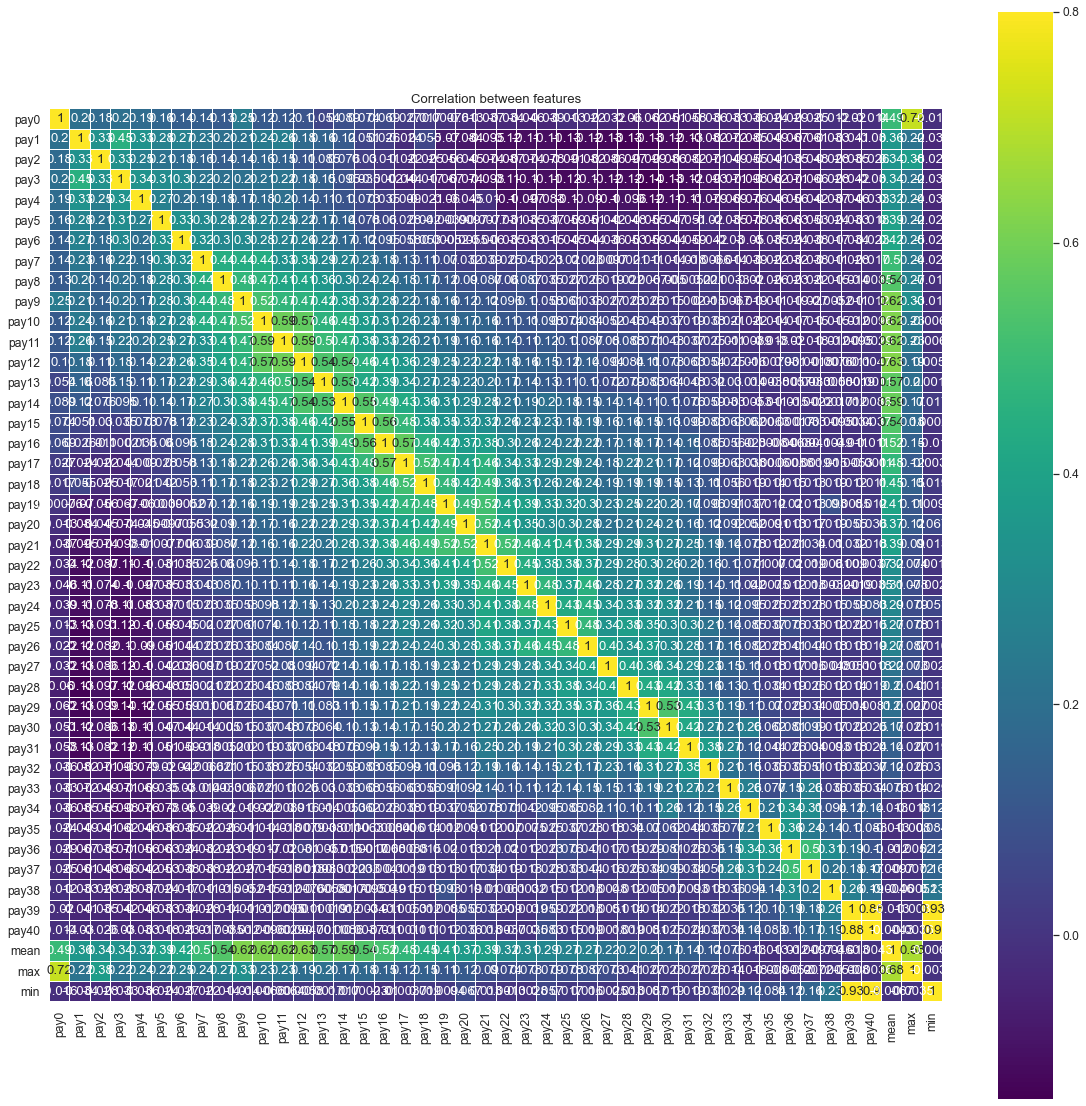

In [524]:
corrMatrix=pay.corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(20, 20))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

In [525]:
all_data_p = all_data.join(pay)

In [526]:
all_data_p.head()

,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6,source,pay0,pay1,pay2,pay3,pay4,pay5,pay6,pay7,pay8,pay9,pay10,pay11,pay12,pay13,pay14,pay15,pay16,pay17,pay18,pay19,pay20,pay21,pay22,pay23,pay24,pay25,pay26,pay27,pay28,pay29,pay30,pay31,pay32,pay33,pay34,pay35,pay36,pay37,pay38,pay39,pay40,mean,max,min
0,ID_P6IMAB9,"['5-2021', '4-2021', '5-2019', '6-2019', '12-2018', '11-2018', '3-2020', '9-2018', '4-2018', '2-2020', '4-2019', '1-2019', '8-2018', '3-2019', '2-2019', '10-2018', '5-2018', '8-2019', '7-2019', '7-2018', '11-2019', '9-2020']","[55.0, 110.0, 240.0, 900.0, 1330.0, 1190.0, 160.0, 1570.0, 2000.0, 170.0, 235.0, 1505.0, 200.0, 1075.0, 715.0, 550.0, 1405.0, 120.0, 180.0, 1365.0, 55.0, 55.0]",110.0,1650.0,1500.0,50.0,165.0,3000.0,train,55.0,110.0,240.0,900.0,1330.0,1190.0,160.0,1570.0,2000.0,170.0,235.0,1505.0,200.0,1075.0,715.0,550.0,1405.0,120.0,180.0,1365.0,55.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,399.651163,2000.0,0.0
1,ID_AF1HPAT,"['11-2017', '10-2017', '8-2018', '3-2018', '4-2018', '2-2018', '1-2018', '11-2018']","[1120.0, 3120.0, 1200.0, 880.0, 1360.0, 880.0, 1200.0, 240.0]",1120.0,1240.0,1360.0,760.0,560.0,1520.0,train,1120.0,3120.0,1200.0,880.0,1360.0,880.0,1200.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,305.116279,3120.0,0.0
2,ID_12K3MTU,"['5-2021', '2-2021', '3-2021', '4-2021', '2-2019', '11-2020', '12-2019', '8-2019', '7-2019', '4-2020', '9-2020', '6-2020', '12-2020', '5-2019', '8-2020', '1-2021', '1-2019', '6-2019', '11-2019', '2-2020', '7-2020', '1-2020', '9-2019', '5-2020', '10-2019', '10-2020', '3-2020', '3-2019', '4-2018', '8-2018', '11-2018', '2-2018', '5-2018', '7-2018']","[460.0, 440.0, 650.0, 165.0, 1425.0, 330.0, 330.0, 550.0, 550.0, 660.0, 495.0, 330.0, 440.0, 605.0, 275.0, 110.0, 1435.0, 605.0, 220.0, 220.0, 55.0, 275.0, 220.0, 440.0, 685.0, 385.0, 110.0, 1600.0, 660.0, 440.0, 1080.0, 955.0, 660.0, 330.0]",1005.0,165.0,165.0,375.0,3000.0,165.0,train,460.0,440.0,650.0,165.0,1425.0,330.0,330.0,550.0,550.0,660.0,495.0,330.0,440.0,605.0,275.0,110.0,1435.0,605.0,220.0,220.0,55.0,275.0,220.0,440.0,685.0,385.0,110.0,1600.0,660.0,440.0,1080.0,955.0,660.0,330.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,460.232558,1600.0,0.0
3,ID_KIAESLK,"['6-2018', '4-2019', '6-2019', '3-2019', '7-2018', '7-2019', '4-2018', '8-2018', '9-2019', '5-2018', '2-2019', '9-2018', '11-2019', '11-2018', '10-2018', '12-2018']","[1375.0, 1540.0, 1455.0, 1540.0, 1434.0, 1540.0, 1485.0, 1430.0, 660.0, 1485.0, 1265.0, 1265.0, 1430.0, 1375.0, 1430.0, 1485.0]",1540.0,1430.0,851.0,1595.0,1320.0,4154.0,train,1375.0,1540.0,1455.0,1540.0,1434.0,1540.0,1485.0,1430.0,660.0,1485.0,1265.0,1265.0,1430.0,1375.0,1430.0,1485.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,551.953488,1540.0,0.0
4,ID_SGM2MXY,"['3-2018', '12-2020', '4-2020', '3-2020', '6-2020', '4-2018', '8-2020', '4-2019', '5-2019', '10-2020', '11-2020', '9-2020', '5-2020', '2-2020', '7-2020', '6-2018', '5-2018', '12-2018', '3-2019', '11-2018', '9-2018', '2-2019', '1-2019', '1-2020', '2-2018', '6-2019', '8-2018', '8-2019', '7-2019']","[1420.0, 1618.0, 1522.0, 1125.0, 1043.0, 1405.0, 1265.0, 480.0, 635.0, 1565.0, 1445.0, 1585.0, 1312.0, 1110.0, 990.0, 2330.0, 1555.0, 740.0, 749.0, 1086.0, 160.0, 763.0, 593.0, 995.0, 3295.0, 270.0, 165.0, 230.0, 285.0]",550.0,288.0,100.0,190.0,100.0,120.0,train,1420.0,1618.0,1522.0,1125.0,1043.0,1405.0,1265.0,480.0,635.0,1565.0,1445.0,1585.0,1312.0,1110.0,990.0,2330.0,1555.0,740.0,749.0,1086.0,160.0,763.0,593.0,995.0,3295.0,270.0,165.0,230.0,285.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,814.674419,3295.0,0.0


In [527]:
all_data.tail()

,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6,source
2995,ID_T2DY5KZ,"['3-2021', '4-2018', '3-2018', '4-2020', '2-2019', '6-2018', '7-2018', '5-2018', '9-2018', '3-2019', '1-2019', '8-2018', '2-2018', '11-2018', '10-2018', '12-2018', '9-2019', '4-2019', '8-2020', '5-2019']","[55.0, 555.0, 1430.0, 55.0, 330.0, 825.0, 1325.0, 1263.0, 770.0, 220.0, 605.0, 1155.0, 3990.0, 770.0, 1155.0, 715.0, 55.0, 220.0, 165.0, 110.0]",NaN,NaN,NaN,NaN,NaN,NaN,test
2996,ID_AR11V3N,"['4-2020', '4-2018', '5-2019', '8-2019', '3-2020', '1-2020', '9-2019', '10-2018', '8-2018', '10-2019', '1-2019', '6-2019', '2-2020', '7-2018', '7-2019', '6-2018', '9-2018', '12-2019', '11-2019', '11-2018']","[1111.0, 3300.0, 1151.0, 1204.0, 1280.0, 985.0, 1305.0, 1420.0, 1210.0, 1280.0, 1025.0, 1290.0, 1133.0, 1320.0, 1185.0, 1320.0, 1585.0, 880.0, 1118.0, 1290.0]",NaN,NaN,NaN,NaN,NaN,NaN,test
2997,ID_8DP562X,"['3-2018', '6-2018', '11-2018', '4-2018', '7-2018', '2-2018', '7-2019', '12-2018', '1-2019', '8-2018', '10-2018']","[1180.0, 594.0, 520.0, 1280.0, 820.0, 1050.0, 420.0, 360.0, 520.0, 516.0, 640.0]",NaN,NaN,NaN,NaN,NaN,NaN,test
2998,ID_0DKSLX6,"['10-2018', '9-2018', '1-2019', '6-2018', '8-2018', '6-2019', '11-2018', '2-2019', '12-2017', '7-2019', '7-2018', '4-2019', '1-2018', '12-2018']","[880.0, 1080.0, 960.0, 960.0, 1120.0, 440.0, 1040.0, 640.0, 2240.0, 520.0, 1080.0, 440.0, 480.0, 960.0]",NaN,NaN,NaN,NaN,NaN,NaN,test
2999,ID_MR0OBQH,"['1-2021', '10-2020', '3-2020', '2-2020', '6-2020', '4-2020', '8-2020']","[960.0, 840.0, 1000.0, 1200.0, 1040.0, 1000.0, 960.0]",NaN,NaN,NaN,NaN,NaN,NaN,test


In [528]:
all_data_p.isnull().sum()

ID                  0  
TransactionDates    0  
PaymentsHistory     0  
m1                  750
m2                  750
m3                  750
m4                  750
m5                  750
m6                  750
source              0  
pay0                0  
pay1                0  
pay2                0  
pay3                0  
pay4                0  
pay5                0  
pay6                0  
pay7                0  
pay8                0  
pay9                0  
pay10               0  
pay11               0  
pay12               0  
pay13               0  
pay14               0  
pay15               0  
pay16               0  
pay17               0  
pay18               0  
pay19               0  
pay20               0  
pay21               0  
pay22               0  
pay23               0  
pay24               0  
pay25               0  
pay26               0  
pay27               0  
pay28               0  
pay29               0  
pay30               0  
pay31           

In [529]:
meta.isnull().sum()

ID                     0   
RegistrationDate       0   
Deposit                0   
UpsellDate             2913
AccessoryRate          0   
PaymentMethod          0   
rateTypeEntity         0   
RatePerUnit            0   
DaysOnDeposit          0   
MainApplicantGender    0   
Age                    547 
Region                 155 
Town                   0   
Occupation             0   
SupplierName           0   
Term                   0   
TotalContractValue     0   
ExpectedTermDate       0   
FirstPaymentDate       0   
LastPaymentDate        0   
dtype: int64

In [530]:
meta.shape

(3000, 20)

In [531]:
meta.drop(['UpsellDate'], axis = 1, inplace = True)

In [532]:
for col in meta.columns:
    meta[col] = meta[col].fillna(meta[col].mode()[0])

In [533]:
meta.dtypes

ID                     object 
RegistrationDate       object 
Deposit                int64  
AccessoryRate          float64
PaymentMethod          object 
rateTypeEntity         object 
RatePerUnit            int64  
DaysOnDeposit          int64  
MainApplicantGender    object 
Age                    float64
Region                 object 
Town                   object 
Occupation             object 
SupplierName           object 
Term                   int64  
TotalContractValue     float64
ExpectedTermDate       object 
FirstPaymentDate       object 
LastPaymentDate        object 
dtype: object

In [534]:
meta.head()

,ID,RegistrationDate,Deposit,AccessoryRate,PaymentMethod,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,Town,Occupation,SupplierName,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate
0,ID_ECQME2K,2017-09-14 09:37:03,2000,0.0,FINANCED,DAILY,40,7,Female,34.0,Western,Bungoma,Farmer,d_light,364,16560.0,2018-09-13 09:37:03,2017-09-14 09:37:03,2018-12-30 09:20:00
1,ID_3CU8FA2,2020-01-10 13:01:49,2000,0.0,FINANCED,DAILY,40,3,Male,31.0,Nyanza,Kisumu,Driver/Motorbike Rider,d_light,270,12800.0,2020-10-06 13:01:49,2020-01-10 13:01:57,2021-05-05 10:25:15
2,ID_GQ0UY5S,2020-01-04 09:47:30,2000,0.0,FINANCED,DAILY,40,3,Male,42.0,Coast Region,Kilifi,Driver/Motorbike Rider,d_light,270,12800.0,2020-09-30 09:47:30,2020-01-04 09:47:38,2020-12-13 12:59:17
3,ID_8K4M1PP,2017-08-21 10:29:35,2000,0.0,FINANCED,DAILY,40,7,Male,31.0,Nyanza,Homa Bay,Labourer,d_light,364,16560.0,2018-08-20 10:29:35,2017-08-21 10:29:37,2019-03-11 15:17:21
4,ID_T3ANBPN,2018-02-14 16:49:43,2999,0.0,FINANCED,DAILY,55,3,Male,44.0,South Rift,Narok,Business,d_light,547,33084.0,2019-08-15 16:49:43,2018-02-14 16:50:02,2021-05-22 16:17:33


In [535]:
meta.describe().T

,count,mean,std,min,25%,50%,75%,max
Deposit,3000.0,2339.357333,425.323629,0.0,2000.0,2000.0,2500.0,3500.0
AccessoryRate,3000.0,1.375667,8.893944,0.0,0.0,0.0,0.0,120.0
RatePerUnit,3000.0,49.127333,47.161155,35.0,40.0,40.0,55.0,1000.0
DaysOnDeposit,3000.0,4.587333,3.308376,0.0,3.0,3.0,7.0,60.0
Age,3000.0,38.092000,11.200745,20.0,31.0,34.0,44.0,92.0
Term,3000.0,411.577667,120.450682,12.0,364.0,364.0,547.0,621.0
TotalContractValue,3000.0,22939.425667,10338.885591,10800.0,16560.0,16560.0,33080.0,64484.0


In [536]:
meta.describe(include = object).T

,count,unique,top,freq
ID,3000,3000,ID_20FD8VD,1
RegistrationDate,3000,2998,2015-12-11 00:00:00,3
PaymentMethod,3000,1,FINANCED,3000
rateTypeEntity,3000,3,DAILY,2990
MainApplicantGender,3000,2,Male,1926
Region,3000,7,Nyanza,728
Town,3000,47,Kilifi,182
Occupation,3000,7,Business,971
SupplierName,3000,1,d_light,3000
ExpectedTermDate,3000,2998,2016-12-09 00:00:00,3


<AxesSubplot:xlabel='MainApplicantGender', ylabel='count'>

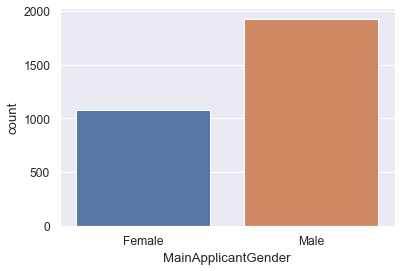

In [537]:
sns.countplot(meta.MainApplicantGender)

<AxesSubplot:xlabel='Town', ylabel='count'>

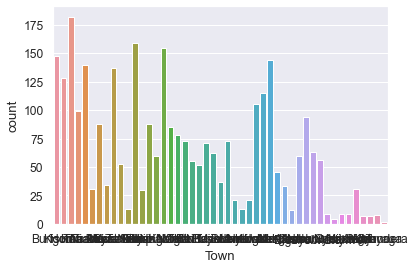

In [538]:
sns.countplot(meta.Town)

<AxesSubplot:xlabel='Region', ylabel='count'>

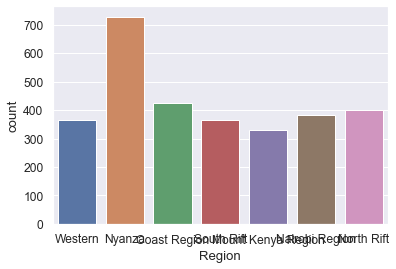

In [539]:
sns.countplot(meta.Region)

In [540]:
col = ['PaymentMethod','rateTypeEntity', 'MainApplicantGender','Region','Town','Occupation','SupplierName']
for variable in col:
    count_dict_tr = meta[variable].value_counts().to_dict()
    meta[variable] = meta[variable].map(count_dict_tr)

In [541]:
meta.head()

,ID,RegistrationDate,Deposit,AccessoryRate,PaymentMethod,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,Town,Occupation,SupplierName,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate
0,ID_ECQME2K,2017-09-14 09:37:03,2000,0.0,3000,2990,40,7,1074,34.0,365,148,943,3000,364,16560.0,2018-09-13 09:37:03,2017-09-14 09:37:03,2018-12-30 09:20:00
1,ID_3CU8FA2,2020-01-10 13:01:49,2000,0.0,3000,2990,40,3,1926,31.0,728,128,215,3000,270,12800.0,2020-10-06 13:01:49,2020-01-10 13:01:57,2021-05-05 10:25:15
2,ID_GQ0UY5S,2020-01-04 09:47:30,2000,0.0,3000,2990,40,3,1926,42.0,424,182,215,3000,270,12800.0,2020-09-30 09:47:30,2020-01-04 09:47:38,2020-12-13 12:59:17
3,ID_8K4M1PP,2017-08-21 10:29:35,2000,0.0,3000,2990,40,7,1926,31.0,728,99,397,3000,364,16560.0,2018-08-20 10:29:35,2017-08-21 10:29:37,2019-03-11 15:17:21
4,ID_T3ANBPN,2018-02-14 16:49:43,2999,0.0,3000,2990,55,3,1926,44.0,367,140,971,3000,547,33084.0,2019-08-15 16:49:43,2018-02-14 16:50:02,2021-05-22 16:17:33


In [542]:
date_cols = [col for col in meta.columns if 'Date' in col]

for col in date_cols:
    meta[col] = pd.to_datetime(meta[col])

In [543]:
diff = meta['RegistrationDate'].dt.hour - meta['FirstPaymentDate'].dt.hour

In [544]:
diff.value_counts()

 0     2943
 1     21  
-1     20  
-2     3   
-12    2   
-14    2   
-9     2   
 6     1   
-10    1   
-3     1   
-5     1   
 7     1   
-13    1   
-15    1   
dtype: int64

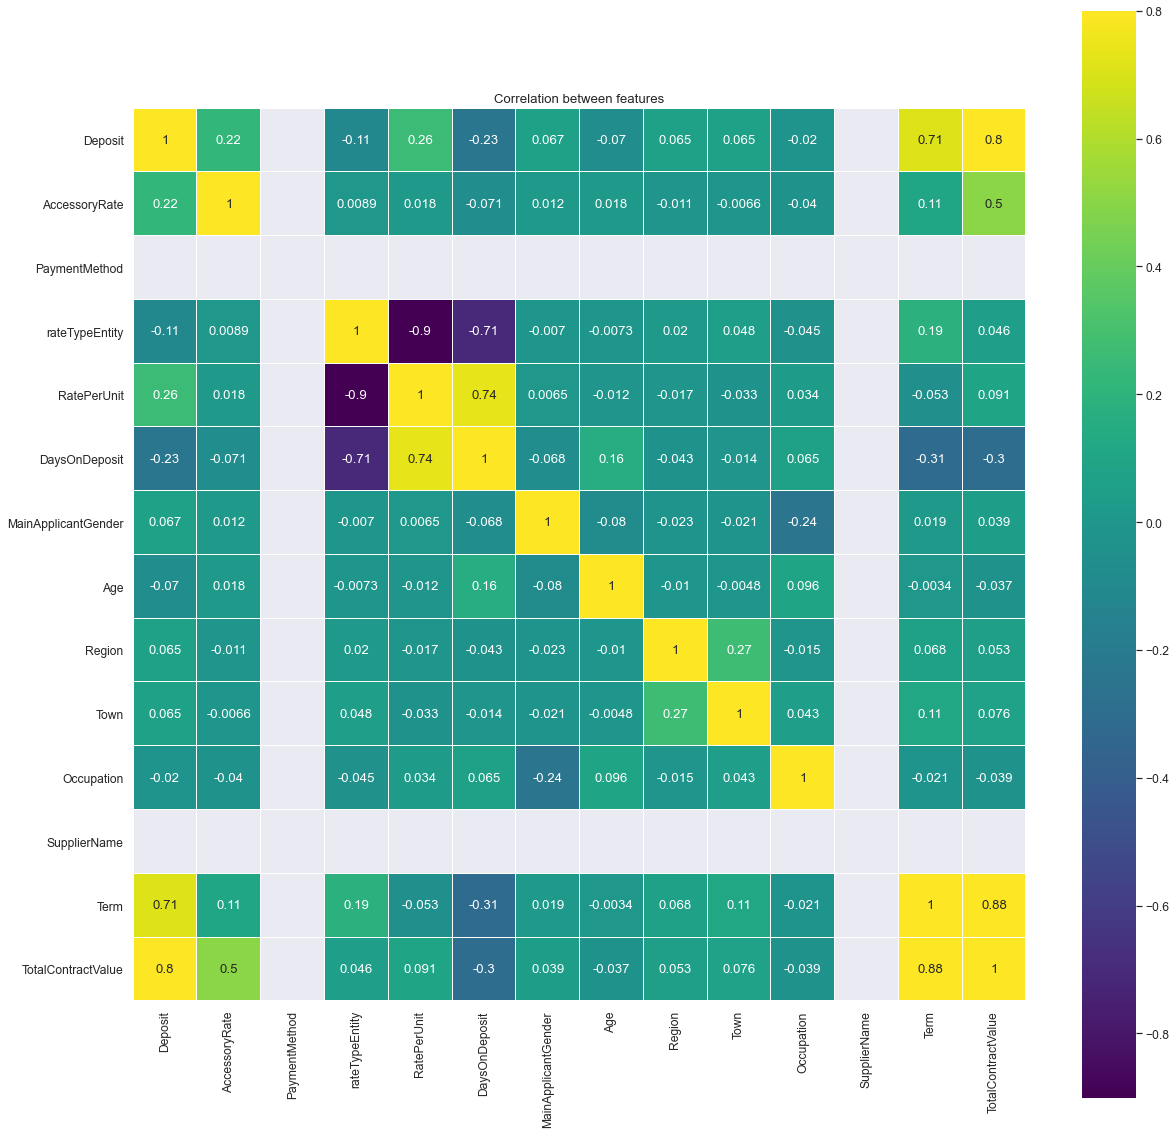

In [545]:
corrMatrix=meta.corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(20, 20))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

In [546]:
meta.drop(['PaymentMethod', 'SupplierName'], axis = 1, inplace = True)

In [547]:
pd.set_option('display.max_colwidth', -1)

C:\Users\Lexard\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [548]:
var.head(23)

,Contract file:
0,ID: Unique contract id
1,RegistrationDate: Registration Date
2,Deposit: amount paid upfront by customer
3,Upsell Date: if upsell date of the upsell
4,Accessory rate: Rate per Unit for an Upsell
5,Payment Method: indicates if the contract is financed or a cash sale
6,rateTypeEntity: payment frequency (daily or monthly)
7,RatePerUnit: Amount needed to generate a token for a minimum credit period specified by the rate type
8,DaysOnDeposit: Number of days credited with the deposit payment
9,MainApplicantGender : Gender of the applicant


In [549]:
import timedelta
from dateutil.relativedelta import relativedelta
meta['payment_after_six_months'] = meta['LastPaymentDate'].apply(lambda x: x + relativedelta(months=6))

meta.head()

,ID,RegistrationDate,Deposit,AccessoryRate,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,Town,Occupation,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate,payment_after_six_months
0,ID_ECQME2K,2017-09-14 09:37:03,2000,0.0,2990,40,7,1074,34.0,365,148,943,364,16560.0,2018-09-13 09:37:03,2017-09-14 09:37:03,2018-12-30 09:20:00,2019-06-30 09:20:00
1,ID_3CU8FA2,2020-01-10 13:01:49,2000,0.0,2990,40,3,1926,31.0,728,128,215,270,12800.0,2020-10-06 13:01:49,2020-01-10 13:01:57,2021-05-05 10:25:15,2021-11-05 10:25:15
2,ID_GQ0UY5S,2020-01-04 09:47:30,2000,0.0,2990,40,3,1926,42.0,424,182,215,270,12800.0,2020-09-30 09:47:30,2020-01-04 09:47:38,2020-12-13 12:59:17,2021-06-13 12:59:17
3,ID_8K4M1PP,2017-08-21 10:29:35,2000,0.0,2990,40,7,1926,31.0,728,99,397,364,16560.0,2018-08-20 10:29:35,2017-08-21 10:29:37,2019-03-11 15:17:21,2019-09-11 15:17:21
4,ID_T3ANBPN,2018-02-14 16:49:43,2999,0.0,2990,55,3,1926,44.0,367,140,971,547,33084.0,2019-08-15 16:49:43,2018-02-14 16:50:02,2021-05-22 16:17:33,2021-11-22 16:17:33


In [550]:
meta['term_validity'] = (meta['ExpectedTermDate']-meta['RegistrationDate']).dt.days
meta['first_and_last_betweeen'] = (meta['LastPaymentDate']-meta['FirstPaymentDate']).dt.days

meta['six_months_qstars'] = meta['payment_after_six_months'].dt.is_quarter_start
meta['six_months_qend'] = meta['payment_after_six_months'].dt.is_quarter_end

meta['ExpectedTermDate_week'] = meta['ExpectedTermDate'].dt.week
meta['FirstPaymentDate_week'] = meta['FirstPaymentDate'].dt.week
meta['LastPaymentDate_week'] = meta['LastPaymentDate'].dt.week

meta['Dayofweek'] = meta['payment_after_six_months'].dt.dayofweek
meta['DayOfyear'] = meta['payment_after_six_months'].dt.dayofyear
meta['WeekOfyear'] = meta['payment_after_six_months'].dt.weekofyear

meta['payment_after_six_months_month'] = meta['payment_after_six_months'].dt.month
meta['payment_after_six_months_day'] = meta['payment_after_six_months'].dt.day
meta['payment_after_six_months_year'] = meta['payment_after_six_months'].dt.year

C:\Users\Lexard\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys
C:\Users\Lexard\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
C:\Users\Lexard\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
C:\Users\Lexard\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


In [551]:
meta.MainApplicantGender.value_counts()

1926    1926
1074    1074
Name: MainApplicantGender, dtype: int64

In [552]:
cols = ['ExpectedTermDate', 'FirstPaymentDate', 'LastPaymentDate']
for col in cols:
    for date_feature in ['year', 'month', 'day', 'hour', 'minute', 'second']:
        meta[col+date_feature] = getattr(meta[col].dt, date_feature)

In [553]:
meta.head()

,ID,RegistrationDate,Deposit,AccessoryRate,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,Town,Occupation,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate,payment_after_six_months,term_validity,first_and_last_betweeen,six_months_qstars,six_months_qend,ExpectedTermDate_week,FirstPaymentDate_week,LastPaymentDate_week,Dayofweek,DayOfyear,WeekOfyear,payment_after_six_months_month,payment_after_six_months_day,payment_after_six_months_year,ExpectedTermDateyear,ExpectedTermDatemonth,ExpectedTermDateday,ExpectedTermDatehour,ExpectedTermDateminute,ExpectedTermDatesecond,FirstPaymentDateyear,FirstPaymentDatemonth,FirstPaymentDateday,FirstPaymentDatehour,FirstPaymentDateminute,FirstPaymentDatesecond,LastPaymentDateyear,LastPaymentDatemonth,LastPaymentDateday,LastPaymentDatehour,LastPaymentDateminute,LastPaymentDatesecond
0,ID_ECQME2K,2017-09-14 09:37:03,2000,0.0,2990,40,7,1074,34.0,365,148,943,364,16560.0,2018-09-13 09:37:03,2017-09-14 09:37:03,2018-12-30 09:20:00,2019-06-30 09:20:00,364,471,False,True,37,37,52,6,181,26,6,30,2019,2018,9,13,9,37,3,2017,9,14,9,37,3,2018,12,30,9,20,0
1,ID_3CU8FA2,2020-01-10 13:01:49,2000,0.0,2990,40,3,1926,31.0,728,128,215,270,12800.0,2020-10-06 13:01:49,2020-01-10 13:01:57,2021-05-05 10:25:15,2021-11-05 10:25:15,270,480,False,False,41,2,18,4,309,44,11,5,2021,2020,10,6,13,1,49,2020,1,10,13,1,57,2021,5,5,10,25,15
2,ID_GQ0UY5S,2020-01-04 09:47:30,2000,0.0,2990,40,3,1926,42.0,424,182,215,270,12800.0,2020-09-30 09:47:30,2020-01-04 09:47:38,2020-12-13 12:59:17,2021-06-13 12:59:17,270,344,False,False,40,1,50,6,164,23,6,13,2021,2020,9,30,9,47,30,2020,1,4,9,47,38,2020,12,13,12,59,17
3,ID_8K4M1PP,2017-08-21 10:29:35,2000,0.0,2990,40,7,1926,31.0,728,99,397,364,16560.0,2018-08-20 10:29:35,2017-08-21 10:29:37,2019-03-11 15:17:21,2019-09-11 15:17:21,364,567,False,False,34,34,11,2,254,37,9,11,2019,2018,8,20,10,29,35,2017,8,21,10,29,37,2019,3,11,15,17,21
4,ID_T3ANBPN,2018-02-14 16:49:43,2999,0.0,2990,55,3,1926,44.0,367,140,971,547,33084.0,2019-08-15 16:49:43,2018-02-14 16:50:02,2021-05-22 16:17:33,2021-11-22 16:17:33,547,1192,False,False,33,7,20,0,326,47,11,22,2021,2019,8,15,16,49,43,2018,2,14,16,50,2,2021,5,22,16,17,33


In [554]:
meta.drop(['RegistrationDate'], axis = 1, inplace = True)

In [555]:
all_data_final = pd.merge(all_data_p, meta, on='ID')

In [556]:
all_data_final.head()

,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6,source,pay0,pay1,pay2,pay3,pay4,pay5,pay6,pay7,pay8,pay9,pay10,pay11,pay12,pay13,pay14,pay15,pay16,pay17,pay18,pay19,pay20,pay21,pay22,pay23,pay24,pay25,pay26,pay27,pay28,pay29,pay30,pay31,pay32,pay33,pay34,pay35,pay36,pay37,pay38,pay39,pay40,mean,max,min,Deposit,AccessoryRate,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,Town,Occupation,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate,payment_after_six_months,term_validity,first_and_last_betweeen,six_months_qstars,six_months_qend,ExpectedTermDate_week,FirstPaymentDate_week,LastPaymentDate_week,Dayofweek,DayOfyear,WeekOfyear,payment_after_six_months_month,payment_after_six_months_day,payment_after_six_months_year,ExpectedTermDateyear,ExpectedTermDatemonth,ExpectedTermDateday,ExpectedTermDatehour,ExpectedTermDateminute,ExpectedTermDatesecond,FirstPaymentDateyear,FirstPaymentDatemonth,FirstPaymentDateday,FirstPaymentDatehour,FirstPaymentDateminute,FirstPaymentDatesecond,LastPaymentDateyear,LastPaymentDatemonth,LastPaymentDateday,LastPaymentDatehour,LastPaymentDateminute,LastPaymentDatesecond
0,ID_P6IMAB9,"['5-2021', '4-2021', '5-2019', '6-2019', '12-2018', '11-2018', '3-2020', '9-2018', '4-2018', '2-2020', '4-2019', '1-2019', '8-2018', '3-2019', '2-2019', '10-2018', '5-2018', '8-2019', '7-2019', '7-2018', '11-2019', '9-2020']","[55.0, 110.0, 240.0, 900.0, 1330.0, 1190.0, 160.0, 1570.0, 2000.0, 170.0, 235.0, 1505.0, 200.0, 1075.0, 715.0, 550.0, 1405.0, 120.0, 180.0, 1365.0, 55.0, 55.0]",110.0,1650.0,1500.0,50.0,165.0,3000.0,train,55.0,110.0,240.0,900.0,1330.0,1190.0,160.0,1570.0,2000.0,170.0,235.0,1505.0,200.0,1075.0,715.0,550.0,1405.0,120.0,180.0,1365.0,55.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,399.651163,2000.0,0.0,2999,0.0,2990,55,3,1926,66.0,728,155,163,547,33084.0,2019-08-26 16:41:21,2018-02-25 16:41:34,2021-05-01 15:11:35,2021-11-01 15:11:35,547,1160,False,False,35,8,17,0,305,44,11,1,2021,2019,8,26,16,41,21,2018,2,25,16,41,34,2021,5,1,15,11,35
1,ID_AF1HPAT,"['11-2017', '10-2017', '8-2018', '3-2018', '4-2018', '2-2018', '1-2018', '11-2018']","[1120.0, 3120.0, 1200.0, 880.0, 1360.0, 880.0, 1200.0, 240.0]",1120.0,1240.0,1360.0,760.0,560.0,1520.0,train,1120.0,3120.0,1200.0,880.0,1360.0,880.0,1200.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,305.116279,3120.0,0.0,2000,0.0,2990,40,7,1926,48.0,384,73,971,364,16560.0,2018-10-03 10:22:35,2017-10-04 10:21:34,2018-11-05 15:45:27,2019-05-05 15:45:27,364,397,False,False,40,40,45,6,125,18,5,5,2019,2018,10,3,10,22,35,2017,10,4,10,21,34,2018,11,5,15,45,27
2,ID_12K3MTU,"['5-2021', '2-2021', '3-2021', '4-2021', '2-2019', '11-2020', '12-2019', '8-2019', '7-2019', '4-2020', '9-2020', '6-2020', '12-2020', '5-2019', '8-2020', '1-2021', '1-2019', '6-2019', '11-2019', '2-2020', '7-2020', '1-2020', '9-2019', '5-2020', '10-2019', '10-2020', '3-2020', '3-2019', '4-2018', '8-2018', '11-2018', '2-2018', '5-2018', '7-2018']","[460.0, 440.0, 650.0, 165.0, 1425.0, 330.0, 330.0, 550.0, 550.0, 660.0, 495.0, 330.0, 440.0, 605.0, 275.0, 110.0, 1435.0, 605.0, 220.0, 220.0, 55.0, 275.0, 220.0, 440.0, 685.0, 385.0, 110.0, 1600.0, 660.0, 440.0, 1080.0, 955.0, 660.0, 330.0]",1005.0,165.0,165.0,375.0,3000.0,165.0,train,460.0,440.0,650.0,165.0,1425.0,330.0,330.0,550.0,550.0,660.0,495.0,330.0,440.0,605.0,275.0,110.0,1435.0,605.0,220.0,220.0,55.0,275.0,220.0,440.0,685.0,385.0,110.0,1600.0,660.0,440.0,1080.0,955.0,660.0,330.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,460.232558,1600.0,0.0,2999,0.0,2990,55,3,1926,44.0,424,21,215,547,33084.0,2019-07-31 12:58:47,2018-01-30 12:58:56,2021-05-22 14:55:43,2021-11-22 14:55:43,547,1208,False,False,31,5,20,0,326,47,11,22,2021,2019,7,31,12,58,47,2018,1,30,12,58,56,2021,5,22,14,55,43
3,ID_KIAESLK,"['6-2018', '4-2019', '6-2019', '3-2019', '7-2018', '7-2019', '4-2018', '8-2018', '9-2019', '5-2018', '2-2019

In [557]:
all_data_final.shape

(3000, 101)

In [558]:
all_data_final['TotalContractValue_Occupation'] = all_data_final.groupby(['Occupation'])['TotalContractValue'].transform('mean')
all_data_final['TotalContractValue_Deposit'] = all_data_final.groupby(['Deposit'])['TotalContractValue'].transform('mean')
all_data_final['TotalContractValue_Town'] = all_data_final.groupby(['Town'])['TotalContractValue'].transform('mean')

In [559]:
all_data_final['Target'] = list(zip(all_data_final.m1.tolist(), all_data_final.m2.tolist(), all_data_final.m3.tolist(), all_data_final.m4.tolist(),  all_data_final.m5.tolist(), all_data_final.m6.tolist()))

In [560]:
all_data_final.head(2)

,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6,source,pay0,pay1,pay2,pay3,pay4,pay5,pay6,pay7,pay8,pay9,pay10,pay11,pay12,pay13,pay14,pay15,pay16,pay17,pay18,pay19,pay20,pay21,pay22,pay23,pay24,pay25,pay26,pay27,pay28,pay29,pay30,pay31,pay32,pay33,pay34,pay35,pay36,pay37,pay38,pay39,pay40,mean,max,min,Deposit,AccessoryRate,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,Town,Occupation,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate,payment_after_six_months,term_validity,first_and_last_betweeen,six_months_qstars,six_months_qend,ExpectedTermDate_week,FirstPaymentDate_week,LastPaymentDate_week,Dayofweek,DayOfyear,WeekOfyear,payment_after_six_months_month,payment_after_six_months_day,payment_after_six_months_year,ExpectedTermDateyear,ExpectedTermDatemonth,ExpectedTermDateday,ExpectedTermDatehour,ExpectedTermDateminute,ExpectedTermDatesecond,FirstPaymentDateyear,FirstPaymentDatemonth,FirstPaymentDateday,FirstPaymentDatehour,FirstPaymentDateminute,FirstPaymentDatesecond,LastPaymentDateyear,LastPaymentDatemonth,LastPaymentDateday,LastPaymentDatehour,LastPaymentDateminute,LastPaymentDatesecond,TotalContractValue_Occupation,TotalContractValue_Deposit,TotalContractValue_Town,Target
0,ID_P6IMAB9,"['5-2021', '4-2021', '5-2019', '6-2019', '12-2018', '11-2018', '3-2020', '9-2018', '4-2018', '2-2020', '4-2019', '1-2019', '8-2018', '3-2019', '2-2019', '10-2018', '5-2018', '8-2019', '7-2019', '7-2018', '11-2019', '9-2020']","[55.0, 110.0, 240.0, 900.0, 1330.0, 1190.0, 160.0, 1570.0, 2000.0, 170.0, 235.0, 1505.0, 200.0, 1075.0, 715.0, 550.0, 1405.0, 120.0, 180.0, 1365.0, 55.0, 55.0]",110.0,1650.0,1500.0,50.0,165.0,3000.0,train,55.0,110.0,240.0,900.0,1330.0,1190.0,160.0,1570.0,2000.0,170.0,235.0,1505.0,200.0,1075.0,715.0,550.0,1405.0,120.0,180.0,1365.0,55.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,399.651163,2000.0,0.0,2999,0.0,2990,55,3,1926,66.0,728,155,163,547,33084.0,2019-08-26 16:41:21,2018-02-25 16:41:34,2021-05-01 15:11:35,2021-11-01 15:11:35,547,1160,False,False,35,8,17,0,305,44,11,1,2021,2019,8,26,16,41,21,2018,2,25,16,41,34,2021,5,1,15,11,35,23467.435583,35751.904192,24607.561290,"(110.0, 1650.0, 1500.0, 50.0, 165.0, 3000.0)"
1,ID_AF1HPAT,"['11-2017', '10-2017', '8-2018', '3-2018', '4-2018', '2-2018', '1-2018', '11-2018']","[1120.0, 3120.0, 1200.0, 880.0, 1360.0, 880.0, 1200.0, 240.0]",1120.0,1240.0,1360.0,760.0,560.0,1520.0,train,1120.0,3120.0,1200.0,880.0,1360.0,880.0,1200.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,305.116279,3120.0,0.0,2000,0.0,2990,40,7,1926,48.0,384,73,971,364,16560.0,2018-10-03 10:22:35,2017-10-04 10:21:34,2018-11-05 15:45:27,2019-05-05 15:45:27,364,397,False,False,40,40,45,6,125,18,5,5,2019,2018,10,3,10,22,35,2017,10,4,10,21,34,2018,11,5,15,45,27,22537.646756,15384.523057,21959.068493,"(1120.0, 1240.0, 1360.0, 760.0, 560.0, 1520.0)"


In [561]:
all_data_final_exploded = all_data_final.explode('Target').reset_index(drop=True)

In [562]:
all_data_final_exploded.shape

(18000, 105)

In [563]:
all_data_final_L.isnull().sum()

ID                        0   
TransactionDates          0   
PaymentsHistory           0   
m1                        4500
m2                        4500
m3                        4500
m4                        4500
m5                        4500
m6                        4500
source                    0   
pay0                      0   
pay1                      0   
pay2                      0   
pay3                      0   
pay4                      0   
pay5                      0   
pay6                      0   
pay7                      0   
pay8                      0   
pay9                      0   
pay10                     0   
pay11                     0   
pay12                     0   
pay13                     0   
pay14                     0   
pay15                     0   
pay16                     0   
pay17                     0   
pay18                     0   
pay19                     0   
pay20                     0   
pay21                     0   
pay22   

In [564]:
all_data_final_exploded.head()

,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6,source,pay0,pay1,pay2,pay3,pay4,pay5,pay6,pay7,pay8,pay9,pay10,pay11,pay12,pay13,pay14,pay15,pay16,pay17,pay18,pay19,pay20,pay21,pay22,pay23,pay24,pay25,pay26,pay27,pay28,pay29,pay30,pay31,pay32,pay33,pay34,pay35,pay36,pay37,pay38,pay39,pay40,mean,max,min,Deposit,AccessoryRate,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,Town,Occupation,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate,payment_after_six_months,term_validity,first_and_last_betweeen,six_months_qstars,six_months_qend,ExpectedTermDate_week,FirstPaymentDate_week,LastPaymentDate_week,Dayofweek,DayOfyear,WeekOfyear,payment_after_six_months_month,payment_after_six_months_day,payment_after_six_months_year,ExpectedTermDateyear,ExpectedTermDatemonth,ExpectedTermDateday,ExpectedTermDatehour,ExpectedTermDateminute,ExpectedTermDatesecond,FirstPaymentDateyear,FirstPaymentDatemonth,FirstPaymentDateday,FirstPaymentDatehour,FirstPaymentDateminute,FirstPaymentDatesecond,LastPaymentDateyear,LastPaymentDatemonth,LastPaymentDateday,LastPaymentDatehour,LastPaymentDateminute,LastPaymentDatesecond,TotalContractValue_Occupation,TotalContractValue_Deposit,TotalContractValue_Town,Target
0,ID_P6IMAB9,"['5-2021', '4-2021', '5-2019', '6-2019', '12-2018', '11-2018', '3-2020', '9-2018', '4-2018', '2-2020', '4-2019', '1-2019', '8-2018', '3-2019', '2-2019', '10-2018', '5-2018', '8-2019', '7-2019', '7-2018', '11-2019', '9-2020']","[55.0, 110.0, 240.0, 900.0, 1330.0, 1190.0, 160.0, 1570.0, 2000.0, 170.0, 235.0, 1505.0, 200.0, 1075.0, 715.0, 550.0, 1405.0, 120.0, 180.0, 1365.0, 55.0, 55.0]",110.0,1650.0,1500.0,50.0,165.0,3000.0,train,55.0,110.0,240.0,900.0,1330.0,1190.0,160.0,1570.0,2000.0,170.0,235.0,1505.0,200.0,1075.0,715.0,550.0,1405.0,120.0,180.0,1365.0,55.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,399.651163,2000.0,0.0,2999,0.0,2990,55,3,1926,66.0,728,155,163,547,33084.0,2019-08-26 16:41:21,2018-02-25 16:41:34,2021-05-01 15:11:35,2021-11-01 15:11:35,547,1160,False,False,35,8,17,0,305,44,11,1,2021,2019,8,26,16,41,21,2018,2,25,16,41,34,2021,5,1,15,11,35,23467.435583,35751.904192,24607.56129,110.0
1,ID_P6IMAB9,"['5-2021', '4-2021', '5-2019', '6-2019', '12-2018', '11-2018', '3-2020', '9-2018', '4-2018', '2-2020', '4-2019', '1-2019', '8-2018', '3-2019', '2-2019', '10-2018', '5-2018', '8-2019', '7-2019', '7-2018', '11-2019', '9-2020']","[55.0, 110.0, 240.0, 900.0, 1330.0, 1190.0, 160.0, 1570.0, 2000.0, 170.0, 235.0, 1505.0, 200.0, 1075.0, 715.0, 550.0, 1405.0, 120.0, 180.0, 1365.0, 55.0, 55.0]",110.0,1650.0,1500.0,50.0,165.0,3000.0,train,55.0,110.0,240.0,900.0,1330.0,1190.0,160.0,1570.0,2000.0,170.0,235.0,1505.0,200.0,1075.0,715.0,550.0,1405.0,120.0,180.0,1365.0,55.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,399.651163,2000.0,0.0,2999,0.0,2990,55,3,1926,66.0,728,155,163,547,33084.0,2019-08-26 16:41:21,2018-02-25 16:41:34,2021-05-01 15:11:35,2021-11-01 15:11:35,547,1160,False,False,35,8,17,0,305,44,11,1,2021,2019,8,26,16,41,21,2018,2,25,16,41,34,2021,5,1,15,11,35,23467.435583,35751.904192,24607.56129,1650.0
2,ID_P6IMAB9,"['5-2021', '4-2021', '5-2019', '6-2019', '12-2018', '11-2018', '3-2020', '9-2018', '4-2018', '2-2020', '4-2019', '1-2019', '8-2018', '3-2019', '2-2019', '10-2018', '5-2018', '8-2019', '7-2019', '7-2018', '11-2019', '9-2020']","[55.0, 110.0, 240.0, 900.0, 1330.0, 1190.0, 160.0, 1570.0, 2000.0, 170.0, 235.0, 1505.0, 200.0, 1075.0, 715.0, 550.0, 1405.0, 120.0, 180.0, 1365.0, 55.0, 55.0]",110.0,1650.0,1500.0,50.0,165.0,3000.0,train,55.0,110.0,240.0,900.0,1330.0,1190.0,160.0,1570.0,2000.0,170.0,235.0,1505.0,200.0,1075.0,715.0,550.0,1405.0,120.0,180.0,1365.0,55.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,399.651163,2000.0,0.0,2999,0.0,2990,55,3,1926,66.0,728,155,163,547,33084.0,2019-08-26 16:41:21,2018-02-25 16:41:34,2021-05-01 15:11:35,2021-11-01 15:11:35,547,1160,Fa

In [565]:
drops = ['TransactionDates','PaymentsHistory','m1','m2','m3','m4','m5','m6','ExpectedTermDate','FirstPaymentDate','LastPaymentDate']
for col in drops:
    all_data_final_exploded = all_data_final_exploded.drop([col], axis = 1)

In [566]:
all_data_final_exploded.dtypes

ID                                object        
source                            object        
pay0                              float64       
pay1                              float64       
pay2                              float64       
pay3                              float64       
pay4                              float64       
pay5                              float64       
pay6                              float64       
pay7                              float64       
pay8                              float64       
pay9                              float64       
pay10                             float64       
pay11                             float64       
pay12                             float64       
pay13                             float64       
pay14                             float64       
pay15                             float64       
pay16                             float64       
pay17                             float64       
pay18               

In [567]:
all_data_final_exploded['Age'] = all_data_final_exploded['Age'].astype(int)
all_data_final_exploded['Target'] = all_data_final_exploded['Target'].astype(float)

In [568]:
col = ['six_months_qstars','six_months_qend']
for variable in col:
    count_dict_tr = meta[variable].value_counts().to_dict()
    meta[variable] = meta[variable].map(count_dict_tr)

In [569]:
train_df = all_data_final_exploded.loc[all_data_final_exploded['source']=='train']
test_df = all_data_final_exploded.loc[all_data_final_exploded['source']=='test'] 

In [570]:
train_df.isnull().sum().any()

False

In [571]:
test_df.isnull().sum()

ID                                0   
source                            0   
pay0                              0   
pay1                              0   
pay2                              0   
pay3                              0   
pay4                              0   
pay5                              0   
pay6                              0   
pay7                              0   
pay8                              0   
pay9                              0   
pay10                             0   
pay11                             0   
pay12                             0   
pay13                             0   
pay14                             0   
pay15                             0   
pay16                             0   
pay17                             0   
pay18                             0   
pay19                             0   
pay20                             0   
pay21                             0   
pay22                             0   
pay23                    

In [572]:
train_df.shape

(13500, 94)

In [573]:
test_df.shape

(4500, 94)

In [574]:
X.shape

(13500, 91)

In [575]:
X = train_df.drop(['Target','ID','source','payment_after_six_months'], axis = 1)
y = train_df['Target']
test_df.drop(['Target','ID','source','payment_after_six_months'], axis = 1, inplace = True)

C:\Users\Lexard\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [576]:
X.tail()

,pay0,pay1,pay2,pay3,pay4,pay5,pay6,pay7,pay8,pay9,pay10,pay11,pay12,pay13,pay14,pay15,pay16,pay17,pay18,pay19,pay20,pay21,pay22,pay23,pay24,pay25,pay26,pay27,pay28,pay29,pay30,pay31,pay32,pay33,pay34,pay35,pay36,pay37,pay38,pay39,pay40,mean,max,min,Deposit,AccessoryRate,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,Town,Occupation,Term,TotalContractValue,term_validity,first_and_last_betweeen,six_months_qstars,six_months_qend,ExpectedTermDate_week,FirstPaymentDate_week,LastPaymentDate_week,Dayofweek,DayOfyear,WeekOfyear,payment_after_six_months_month,payment_after_six_months_day,payment_after_six_months_year,ExpectedTermDateyear,ExpectedTermDatemonth,ExpectedTermDateday,ExpectedTermDatehour,ExpectedTermDateminute,ExpectedTermDatesecond,FirstPaymentDateyear,FirstPaymentDatemonth,FirstPaymentDateday,FirstPaymentDatehour,FirstPaymentDateminute,FirstPaymentDatesecond,LastPaymentDateyear,LastPaymentDatemonth,LastPaymentDateday,LastPaymentDatehour,LastPaymentDateminute,LastPaymentDatesecond,TotalContractValue_Occupation,TotalContractValue_Deposit,TotalContractValue_Town
13495,165.0,55.0,165.0,165.0,275.0,495.0,165.0,1430.0,1485.0,1485.0,1265.0,220.0,1265.0,990.0,1320.0,1595.0,1045.0,1375.0,220.0,275.0,1595.0,1380.0,718.0,1485.0,275.0,160.0,440.0,170.0,330.0,110.0,110.0,220.0,385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568.093023,1595.0,0.0,2500,0.0,2990,55,3,1926,34,367,60,943,556,33080.0,556,1139,False,False,40,13,19,3,315,45,11,11,2021,2019,10,6,14,26,59,2018,3,29,14,27,2,2021,5,11,18,43,36,23000.457052,33335.03876,21482.166667
13496,165.0,55.0,165.0,165.0,275.0,495.0,165.0,1430.0,1485.0,1485.0,1265.0,220.0,1265.0,990.0,1320.0,1595.0,1045.0,1375.0,220.0,275.0,1595.0,1380.0,718.0,1485.0,275.0,160.0,440.0,170.0,330.0,110.0,110.0,220.0,385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568.093023,1595.0,0.0,2500,0.0,2990,55,3,1926,34,367,60,943,556,33080.0,556,1139,False,False,40,13,19,3,315,45,11,11,2021,2019,10,6,14,26,59,2018,3,29,14,27,2,2021,5,11,18,43,36,23000.457052,33335.03876,21482.166667
13497,165.0,55.0,165.0,165.0,275.0,495.0,165.0,1430.0,1485.0,1485.0,1265.0,220.0,1265.0,990.0,1320.0,1595.0,1045.0,1375.0,220.0,275.0,1595.0,1380.0,718.0,1485.0,275.0,160.0,440.0,170.0,330.0,110.0,110.0,220.0,385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568.093023,1595.0,0.0,2500,0.0,2990,55,3,1926,34,367,60,943,556,33080.0,556,1139,False,False,40,13,19,3,315,45,11,11,2021,2019,10,6,14,26,59,2018,3,29,14,27,2,2021,5,11,18,43,36,23000.457052,33335.03876,21482.166667
13498,165.0,55.0,165.0,165.0,275.0,495.0,165.0,1430.0,1485.0,1485.0,1265.0,220.0,1265.0,990.0,1320.0,1595.0,1045.0,1375.0,220.0,275.0,1595.0,1380.0,718.0,1485.0,275.0,160.0,440.0,170.0,330.0,110.0,110.0,220.0,385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568.093023,1595.0,0.0,2500,0.0,2990,55,3,1926,34,367,60,943,556,33080.0,556,1139,False,False,40,13,19,3,315,45,11,11,2021,2019,10,6,14,26,59,2018,3,29,14,27,2,2021,5,11,18,43,36,23000.457052,33335.03876,21482.166667
13499,165.0,55.0,165.0,165.0,275.0,495.0,165.0,1430.0,1485.0,1485.0,1265.0,220.0,1265.0,990.0,1320.0,1595.0,1045.0,1375.0,220.0,275.0,1595.0,1380.0,718.0,1485.0,275.0,160.0,440.0,170.0,330.0,110.0,110.0,220.0,385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568.093023,1595.0,0.0,2500,0.0,2990,55,3,1926,34,367,60,943,556,33080.0,556,1139,False,False,40,13,19,3,315,45,11,11,2021,2019,10,6,14,26,59,2018,3,29,14,27,2,2021,5,11,18,43,36,23000.457052,33335.03876,21482.166667


In [577]:
y = y.astype(float)
test_df = test_df.astype(float)
X = X.astype(float)

In [582]:
errlgb = []
y_pred_totlgb = []

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'rmse',
         'learning_rate':0.01,
         'num_iterations': 7000
         }

fold = KFold(n_splits=20, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X,y):
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test)
    
    clf = lgb.train(params=param, 
                    early_stopping_rounds=200,
                    verbose_eval=500,
                    train_set=train_data,
                    valid_sets=[test_data])

    y_pred = clf.predict(X_test) 

    print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    
    errlgb.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    p = clf.predict(test_df)
    
    y_pred_totlgb.append(p)

C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[172]	valid_0's rmse: 770.754
RMSE:  770.7537848739217


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[259]	valid_0's rmse: 786.758
RMSE:  786.7576299046189


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[152]	valid_0's rmse: 836.274
RMSE:  836.2738307350136


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[195]	valid_0's rmse: 1332.14
RMSE:  1332.1386737166258


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[226]	valid_0's rmse: 826.759
RMSE:  826.7592771924626


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[199]	valid_0's rmse: 891.028
RMSE:  891.0275093324351


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[237]	valid_0's rmse: 823.169
RMSE:  823.1693143911983


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[250]	valid_0's rmse: 814.838
RMSE:  814.8378494330989


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[199]	valid_0's rmse: 739.286
RMSE:  739.2861719469265


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[175]	valid_0's rmse: 785.432
RMSE:  785.4316225957783


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[171]	valid_0's rmse: 977.504
RMSE:  977.5043973719557


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[232]	valid_0's rmse: 791.934
RMSE:  791.9336996256362


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[215]	valid_0's rmse: 734.318
RMSE:  734.3176827311032


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[168]	valid_0's rmse: 802.776
RMSE:  802.7755967284272


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[210]	valid_0's rmse: 763.369
RMSE:  763.3694031029498


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[162]	valid_0's rmse: 803.29
RMSE:  803.2903021945378


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[126]	valid_0's rmse: 815.259
RMSE:  815.2592198799697


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[184]	valid_0's rmse: 804.69
RMSE:  804.6895360129745


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[200]	valid_0's rmse: 803.695
RMSE:  803.6948460386596


C:\Users\Lexard\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[194]	valid_0's rmse: 1023.27
RMSE:  1023.2701954794857


In [583]:
np.mean(y_pred_totlgb,0)

array([1096.57474207, 1096.57474207, 1096.57474207, ..., 1093.82291076,
       1093.82291076, 1093.82291076])

In [584]:
np.mean(errlgb, 0)

846.3270271643889

In [585]:
predictions = np.mean(y_pred_totlgb,0)
sub = ss.copy()
sub.Target = predictions
sub.to_csv("submission/late_baseline_lightgbm.csv", index = False)

In [586]:
sub.head()

,ID,Target
0,ID_ECQME2K x m1,1096.574742
1,ID_ECQME2K x m2,1096.574742
2,ID_ECQME2K x m3,1096.574742
3,ID_ECQME2K x m4,1096.574742
4,ID_ECQME2K x m5,1096.574742


In [587]:
kf = KFold(n_splits = 10, random_state = SEED, shuffle = True)
from catboost import CatBoostRegressor
OPTIMIZE_ROUNDS = False

model = CatBoostRegressor(
                           eval_metric="RMSE",
                          #  task_type="GPU",
                           random_seed=SEED,
                           early_stopping_rounds=500,
                           learning_rate=0.01,
                           iterations = 900
)

In [588]:
y_valid_pred = 0*y
y_test_pred = 0

for i, (train_index, test_index) in enumerate(kf.split(X)):
    
    # Create data for this fold
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    X_train, X_valid = X.iloc[train_index,:], X.iloc[test_index,:]
    print( "\nFold ", i)
    
    # Run model for this fold
    if OPTIMIZE_ROUNDS:
        cat_model = model.fit( X_train, y_train, 
                               eval_set=[X_valid, y_valid],
                               use_best_model=True
                             )
        print( "  N trees = ", model.tree_count_ )
    else:
        cat_model = model.fit( X_train, y_train )
        
    # Generate validation predictions for this fold
    pred = cat_model.predict(X_valid)
    print( " RMSE", np.sqrt(mean_squared_error(y_valid, pred)) )
    y_valid_pred.iloc[test_index] = pred
    
    # Accumulate test set predictions
    y_test_pred += cat_model.predict(test_df)
    
y_test_pred /= 10  # Average test set predictions

print( "\nRMSE for full training set:" )
np.sqrt(mean_squared_error(y, y_valid_pred))

predictions = y_test_pred
sub = ss.copy()
sub.Target = predictions
sub.to_csv("submission/late_submission_catboost.csv", index = False)


Fold  0
0:	learn: 985.4332632	total: 369ms	remaining: 5m 31s
1:	learn: 983.4533730	total: 398ms	remaining: 2m 58s
2:	learn: 981.4054456	total: 423ms	remaining: 2m 6s
3:	learn: 979.4658242	total: 448ms	remaining: 1m 40s
4:	learn: 977.3506538	total: 476ms	remaining: 1m 25s
5:	learn: 975.3066800	total: 509ms	remaining: 1m 15s
6:	learn: 973.4276854	total: 542ms	remaining: 1m 9s
7:	learn: 971.4804991	total: 588ms	remaining: 1m 5s
8:	learn: 969.6893874	total: 625ms	remaining: 1m 1s
9:	learn: 967.8930834	total: 658ms	remaining: 58.5s
10:	learn: 966.0595426	total: 682ms	remaining: 55.1s
11:	learn: 964.3758156	total: 705ms	remaining: 52.2s
12:	learn: 962.6428594	total: 729ms	remaining: 49.8s
13:	learn: 960.8248036	total: 753ms	remaining: 47.6s
14:	learn: 959.0594810	total: 776ms	remaining: 45.8s
15:	learn: 957.5981957	total: 799ms	remaining: 44.1s
16:	learn: 956.0526359	total: 822ms	remaining: 42.7s
17:	learn: 954.4329675	total: 845ms	remaining: 41.4s
18:	learn: 952.9323528	total: 870ms	remain

157:	learn: 859.5714676	total: 4.32s	remaining: 20.3s
158:	learn: 859.2967490	total: 4.35s	remaining: 20.3s
159:	learn: 859.0938456	total: 4.37s	remaining: 20.2s
160:	learn: 858.8791141	total: 4.4s	remaining: 20.2s
161:	learn: 858.6606656	total: 4.42s	remaining: 20.1s
162:	learn: 858.4140904	total: 4.45s	remaining: 20.1s
163:	learn: 858.2311265	total: 4.47s	remaining: 20.1s
164:	learn: 857.9972693	total: 4.5s	remaining: 20s
165:	learn: 857.7638961	total: 4.52s	remaining: 20s
166:	learn: 857.5369925	total: 4.55s	remaining: 20s
167:	learn: 857.3316036	total: 4.58s	remaining: 19.9s
168:	learn: 857.1083075	total: 4.6s	remaining: 19.9s
169:	learn: 856.8938895	total: 4.63s	remaining: 19.9s
170:	learn: 856.7079737	total: 4.65s	remaining: 19.8s
171:	learn: 856.5024932	total: 4.68s	remaining: 19.8s
172:	learn: 856.2696309	total: 4.7s	remaining: 19.8s
173:	learn: 856.0526734	total: 4.72s	remaining: 19.7s
174:	learn: 855.8399204	total: 4.75s	remaining: 19.7s
175:	learn: 855.6125882	total: 4.77s	r

314:	learn: 840.0912194	total: 8.09s	remaining: 15s
315:	learn: 840.0374245	total: 8.12s	remaining: 15s
316:	learn: 839.9728894	total: 8.14s	remaining: 15s
317:	learn: 839.9225572	total: 8.16s	remaining: 14.9s
318:	learn: 839.8338904	total: 8.19s	remaining: 14.9s
319:	learn: 839.7758052	total: 8.22s	remaining: 14.9s
320:	learn: 839.7340618	total: 8.24s	remaining: 14.9s
321:	learn: 839.6921839	total: 8.26s	remaining: 14.8s
322:	learn: 839.6558824	total: 8.29s	remaining: 14.8s
323:	learn: 839.5952800	total: 8.33s	remaining: 14.8s
324:	learn: 839.5224279	total: 8.35s	remaining: 14.8s
325:	learn: 839.4693574	total: 8.37s	remaining: 14.7s
326:	learn: 839.3911377	total: 8.39s	remaining: 14.7s
327:	learn: 839.3249934	total: 8.41s	remaining: 14.7s
328:	learn: 839.2325119	total: 8.44s	remaining: 14.6s
329:	learn: 839.1822020	total: 8.46s	remaining: 14.6s
330:	learn: 839.1266020	total: 8.49s	remaining: 14.6s
331:	learn: 839.0879918	total: 8.51s	remaining: 14.6s
332:	learn: 839.0531490	total: 8.5

468:	learn: 834.0587739	total: 11.9s	remaining: 10.9s
469:	learn: 834.0426973	total: 11.9s	remaining: 10.9s
470:	learn: 833.9995179	total: 11.9s	remaining: 10.9s
471:	learn: 833.9654762	total: 12s	remaining: 10.8s
472:	learn: 833.9374238	total: 12s	remaining: 10.8s
473:	learn: 833.9113051	total: 12s	remaining: 10.8s
474:	learn: 833.9015940	total: 12s	remaining: 10.8s
475:	learn: 833.8761787	total: 12.1s	remaining: 10.7s
476:	learn: 833.8542749	total: 12.1s	remaining: 10.7s
477:	learn: 833.8301424	total: 12.1s	remaining: 10.7s
478:	learn: 833.8016064	total: 12.1s	remaining: 10.7s
479:	learn: 833.7718638	total: 12.2s	remaining: 10.6s
480:	learn: 833.7571106	total: 12.2s	remaining: 10.6s
481:	learn: 833.7323885	total: 12.2s	remaining: 10.6s
482:	learn: 833.7085251	total: 12.2s	remaining: 10.6s
483:	learn: 833.6857771	total: 12.2s	remaining: 10.5s
484:	learn: 833.6524809	total: 12.3s	remaining: 10.5s
485:	learn: 833.6264564	total: 12.3s	remaining: 10.5s
486:	learn: 833.6011541	total: 12.3s

621:	learn: 830.7125979	total: 16.3s	remaining: 7.29s
622:	learn: 830.6965004	total: 16.3s	remaining: 7.26s
623:	learn: 830.6847175	total: 16.4s	remaining: 7.24s
624:	learn: 830.6732614	total: 16.4s	remaining: 7.21s
625:	learn: 830.6550935	total: 16.4s	remaining: 7.18s
626:	learn: 830.6459374	total: 16.4s	remaining: 7.15s
627:	learn: 830.6282703	total: 16.5s	remaining: 7.13s
628:	learn: 830.6206369	total: 16.5s	remaining: 7.1s
629:	learn: 830.6038499	total: 16.5s	remaining: 7.08s
630:	learn: 830.5889708	total: 16.6s	remaining: 7.06s
631:	learn: 830.5579518	total: 16.6s	remaining: 7.04s
632:	learn: 830.5410690	total: 16.6s	remaining: 7.01s
633:	learn: 830.5191933	total: 16.7s	remaining: 6.99s
634:	learn: 830.5141754	total: 16.7s	remaining: 6.97s
635:	learn: 830.4923823	total: 16.7s	remaining: 6.95s
636:	learn: 830.4735973	total: 16.8s	remaining: 6.93s
637:	learn: 830.4637876	total: 16.8s	remaining: 6.9s
638:	learn: 830.4498587	total: 16.8s	remaining: 6.88s
639:	learn: 830.4348872	total:

775:	learn: 828.2301410	total: 20.5s	remaining: 3.27s
776:	learn: 828.2149937	total: 20.5s	remaining: 3.25s
777:	learn: 828.2053042	total: 20.6s	remaining: 3.22s
778:	learn: 828.1730954	total: 20.6s	remaining: 3.2s
779:	learn: 828.1653813	total: 20.6s	remaining: 3.17s
780:	learn: 828.1547274	total: 20.6s	remaining: 3.14s
781:	learn: 828.1495540	total: 20.6s	remaining: 3.12s
782:	learn: 828.1301088	total: 20.7s	remaining: 3.09s
783:	learn: 828.1190122	total: 20.7s	remaining: 3.06s
784:	learn: 828.1082194	total: 20.7s	remaining: 3.04s
785:	learn: 828.0955575	total: 20.8s	remaining: 3.01s
786:	learn: 828.0898990	total: 20.8s	remaining: 2.98s
787:	learn: 828.0690709	total: 20.8s	remaining: 2.95s
788:	learn: 828.0586906	total: 20.8s	remaining: 2.93s
789:	learn: 828.0335409	total: 20.8s	remaining: 2.9s
790:	learn: 828.0232015	total: 20.9s	remaining: 2.87s
791:	learn: 828.0078268	total: 20.9s	remaining: 2.85s
792:	learn: 827.9958973	total: 20.9s	remaining: 2.82s
793:	learn: 827.9849164	total:

29:	learn: 890.2863687	total: 1.02s	remaining: 29.7s
30:	learn: 889.0484969	total: 1.05s	remaining: 29.5s
31:	learn: 887.7692316	total: 1.08s	remaining: 29.2s
32:	learn: 886.6245922	total: 1.1s	remaining: 28.8s
33:	learn: 885.4317505	total: 1.12s	remaining: 28.6s
34:	learn: 884.2654125	total: 1.15s	remaining: 28.4s
35:	learn: 882.9979160	total: 1.17s	remaining: 28s
36:	learn: 881.8259129	total: 1.19s	remaining: 27.7s
37:	learn: 880.5719150	total: 1.21s	remaining: 27.5s
38:	learn: 879.3601956	total: 1.24s	remaining: 27.3s
39:	learn: 878.1920843	total: 1.26s	remaining: 27.2s
40:	learn: 877.0318121	total: 1.29s	remaining: 27s
41:	learn: 875.8039996	total: 1.31s	remaining: 26.8s
42:	learn: 874.7316824	total: 1.34s	remaining: 26.7s
43:	learn: 873.6840006	total: 1.36s	remaining: 26.6s
44:	learn: 872.5709822	total: 1.39s	remaining: 26.4s
45:	learn: 871.5224347	total: 1.42s	remaining: 26.3s
46:	learn: 870.4508238	total: 1.44s	remaining: 26.2s
47:	learn: 869.4681517	total: 1.46s	remaining: 26s


185:	learn: 807.3043890	total: 5.08s	remaining: 19.5s
186:	learn: 807.1640777	total: 5.12s	remaining: 19.5s
187:	learn: 806.9894494	total: 5.15s	remaining: 19.5s
188:	learn: 806.8272069	total: 5.18s	remaining: 19.5s
189:	learn: 806.6780208	total: 5.21s	remaining: 19.5s
190:	learn: 806.5324901	total: 5.24s	remaining: 19.5s
191:	learn: 806.3778975	total: 5.27s	remaining: 19.4s
192:	learn: 806.2271995	total: 5.3s	remaining: 19.4s
193:	learn: 806.0609586	total: 5.37s	remaining: 19.6s
194:	learn: 805.9163598	total: 5.39s	remaining: 19.5s
195:	learn: 805.7841534	total: 5.49s	remaining: 19.7s
196:	learn: 805.6390487	total: 5.51s	remaining: 19.7s
197:	learn: 805.4842618	total: 5.54s	remaining: 19.6s
198:	learn: 805.2777030	total: 5.6s	remaining: 19.7s
199:	learn: 805.1535352	total: 5.63s	remaining: 19.7s
200:	learn: 804.9799228	total: 5.65s	remaining: 19.7s
201:	learn: 804.8822992	total: 5.68s	remaining: 19.6s
202:	learn: 804.7233541	total: 5.71s	remaining: 19.6s
203:	learn: 804.5951151	total:

338:	learn: 793.7810052	total: 9.58s	remaining: 15.8s
339:	learn: 793.7600499	total: 9.61s	remaining: 15.8s
340:	learn: 793.7171922	total: 9.64s	remaining: 15.8s
341:	learn: 793.6484064	total: 9.68s	remaining: 15.8s
342:	learn: 793.5737430	total: 9.71s	remaining: 15.8s
343:	learn: 793.5291720	total: 9.74s	remaining: 15.7s
344:	learn: 793.4716989	total: 9.77s	remaining: 15.7s
345:	learn: 793.4196985	total: 9.8s	remaining: 15.7s
346:	learn: 793.3808071	total: 9.83s	remaining: 15.7s
347:	learn: 793.3417576	total: 9.87s	remaining: 15.7s
348:	learn: 793.3115094	total: 9.9s	remaining: 15.6s
349:	learn: 793.2695416	total: 9.92s	remaining: 15.6s
350:	learn: 793.2370288	total: 9.95s	remaining: 15.6s
351:	learn: 793.1724672	total: 9.98s	remaining: 15.5s
352:	learn: 793.1398388	total: 10s	remaining: 15.5s
353:	learn: 793.1003475	total: 10s	remaining: 15.5s
354:	learn: 793.0574085	total: 10.1s	remaining: 15.4s
355:	learn: 792.9972226	total: 10.1s	remaining: 15.4s
356:	learn: 792.9674834	total: 10.

491:	learn: 788.9438746	total: 13.5s	remaining: 11.2s
492:	learn: 788.9201942	total: 13.5s	remaining: 11.2s
493:	learn: 788.8997372	total: 13.6s	remaining: 11.2s
494:	learn: 788.8798102	total: 13.6s	remaining: 11.1s
495:	learn: 788.8631665	total: 13.6s	remaining: 11.1s
496:	learn: 788.8327379	total: 13.6s	remaining: 11.1s
497:	learn: 788.8037707	total: 13.7s	remaining: 11s
498:	learn: 788.7905709	total: 13.7s	remaining: 11s
499:	learn: 788.7518416	total: 13.7s	remaining: 11s
500:	learn: 788.7243330	total: 13.7s	remaining: 10.9s
501:	learn: 788.7047644	total: 13.8s	remaining: 10.9s
502:	learn: 788.6888426	total: 13.8s	remaining: 10.9s
503:	learn: 788.6703875	total: 13.8s	remaining: 10.8s
504:	learn: 788.6616031	total: 13.8s	remaining: 10.8s
505:	learn: 788.6521865	total: 13.8s	remaining: 10.8s
506:	learn: 788.6138625	total: 13.9s	remaining: 10.8s
507:	learn: 788.5979063	total: 13.9s	remaining: 10.7s
508:	learn: 788.5704320	total: 13.9s	remaining: 10.7s
509:	learn: 788.5635353	total: 13.

652:	learn: 785.7803511	total: 17.2s	remaining: 6.51s
653:	learn: 785.7614592	total: 17.2s	remaining: 6.48s
654:	learn: 785.7345881	total: 17.3s	remaining: 6.46s
655:	learn: 785.7238986	total: 17.3s	remaining: 6.43s
656:	learn: 785.6927619	total: 17.3s	remaining: 6.4s
657:	learn: 785.6794839	total: 17.3s	remaining: 6.37s
658:	learn: 785.6650983	total: 17.3s	remaining: 6.34s
659:	learn: 785.6502892	total: 17.4s	remaining: 6.31s
660:	learn: 785.6337039	total: 17.4s	remaining: 6.28s
661:	learn: 785.6252597	total: 17.4s	remaining: 6.26s
662:	learn: 785.6061943	total: 17.4s	remaining: 6.23s
663:	learn: 785.5810090	total: 17.5s	remaining: 6.2s
664:	learn: 785.5546144	total: 17.5s	remaining: 6.17s
665:	learn: 785.5288141	total: 17.5s	remaining: 6.15s
666:	learn: 785.5087977	total: 17.5s	remaining: 6.12s
667:	learn: 785.4641582	total: 17.5s	remaining: 6.09s
668:	learn: 785.4541420	total: 17.6s	remaining: 6.07s
669:	learn: 785.4356127	total: 17.6s	remaining: 6.04s
670:	learn: 785.4291552	total:

807:	learn: 783.2020292	total: 21.5s	remaining: 2.45s
808:	learn: 783.1984850	total: 21.5s	remaining: 2.42s
809:	learn: 783.1757620	total: 21.5s	remaining: 2.39s
810:	learn: 783.1565153	total: 21.6s	remaining: 2.37s
811:	learn: 783.1460518	total: 21.6s	remaining: 2.34s
812:	learn: 783.1312293	total: 21.6s	remaining: 2.31s
813:	learn: 783.1202686	total: 21.6s	remaining: 2.29s
814:	learn: 783.0915035	total: 21.7s	remaining: 2.26s
815:	learn: 783.0735229	total: 21.7s	remaining: 2.23s
816:	learn: 783.0598217	total: 21.7s	remaining: 2.21s
817:	learn: 783.0519658	total: 21.7s	remaining: 2.18s
818:	learn: 783.0388815	total: 21.8s	remaining: 2.15s
819:	learn: 783.0162235	total: 21.8s	remaining: 2.13s
820:	learn: 783.0106122	total: 21.8s	remaining: 2.1s
821:	learn: 783.0007440	total: 21.8s	remaining: 2.07s
822:	learn: 782.9802865	total: 21.9s	remaining: 2.04s
823:	learn: 782.9717499	total: 21.9s	remaining: 2.02s
824:	learn: 782.9641387	total: 21.9s	remaining: 1.99s
825:	learn: 782.9570181	total

64:	learn: 896.7208511	total: 1.95s	remaining: 25s
65:	learn: 895.9804241	total: 1.97s	remaining: 24.9s
66:	learn: 895.1310596	total: 2s	remaining: 24.9s
67:	learn: 894.3129218	total: 2.02s	remaining: 24.7s
68:	learn: 893.5610300	total: 2.04s	remaining: 24.6s
69:	learn: 892.8555569	total: 2.09s	remaining: 24.8s
70:	learn: 892.2140024	total: 2.12s	remaining: 24.7s
71:	learn: 891.5021734	total: 2.14s	remaining: 24.6s
72:	learn: 890.8215482	total: 2.17s	remaining: 24.6s
73:	learn: 890.1720229	total: 2.2s	remaining: 24.5s
74:	learn: 889.5412476	total: 2.23s	remaining: 24.5s
75:	learn: 888.8399502	total: 2.25s	remaining: 24.4s
76:	learn: 888.1004285	total: 2.28s	remaining: 24.3s
77:	learn: 887.4905214	total: 2.31s	remaining: 24.3s
78:	learn: 886.8289879	total: 2.33s	remaining: 24.2s
79:	learn: 886.2398399	total: 2.36s	remaining: 24.2s
80:	learn: 885.6140775	total: 2.38s	remaining: 24.1s
81:	learn: 885.1584412	total: 2.41s	remaining: 24s
82:	learn: 884.5465206	total: 2.44s	remaining: 24s
83:

219:	learn: 844.7150872	total: 6.34s	remaining: 19.6s
220:	learn: 844.6205601	total: 6.36s	remaining: 19.5s
221:	learn: 844.4954245	total: 6.38s	remaining: 19.5s
222:	learn: 844.3914489	total: 6.41s	remaining: 19.4s
223:	learn: 844.2569860	total: 6.42s	remaining: 19.4s
224:	learn: 844.1245499	total: 6.45s	remaining: 19.3s
225:	learn: 844.0036985	total: 6.47s	remaining: 19.3s
226:	learn: 843.8747215	total: 6.49s	remaining: 19.3s
227:	learn: 843.7839149	total: 6.51s	remaining: 19.2s
228:	learn: 843.6802803	total: 6.54s	remaining: 19.2s
229:	learn: 843.5482307	total: 6.57s	remaining: 19.1s
230:	learn: 843.3981558	total: 6.59s	remaining: 19.1s
231:	learn: 843.2667644	total: 6.61s	remaining: 19s
232:	learn: 843.1669248	total: 6.63s	remaining: 19s
233:	learn: 843.0528176	total: 6.66s	remaining: 18.9s
234:	learn: 842.9648316	total: 6.68s	remaining: 18.9s
235:	learn: 842.8458401	total: 6.7s	remaining: 18.9s
236:	learn: 842.7326162	total: 6.73s	remaining: 18.8s
237:	learn: 842.6569990	total: 6.

374:	learn: 833.1326577	total: 9.92s	remaining: 13.9s
375:	learn: 833.0858406	total: 9.95s	remaining: 13.9s
376:	learn: 833.0663029	total: 9.97s	remaining: 13.8s
377:	learn: 833.0195962	total: 9.99s	remaining: 13.8s
378:	learn: 832.9931979	total: 10s	remaining: 13.8s
379:	learn: 832.9449174	total: 10s	remaining: 13.7s
380:	learn: 832.9036384	total: 10.1s	remaining: 13.7s
381:	learn: 832.8742271	total: 10.1s	remaining: 13.7s
382:	learn: 832.8367758	total: 10.1s	remaining: 13.6s
383:	learn: 832.7872171	total: 10.1s	remaining: 13.6s
384:	learn: 832.7483134	total: 10.2s	remaining: 13.6s
385:	learn: 832.6902703	total: 10.2s	remaining: 13.6s
386:	learn: 832.6756145	total: 10.2s	remaining: 13.5s
387:	learn: 832.6264350	total: 10.2s	remaining: 13.5s
388:	learn: 832.5945350	total: 10.2s	remaining: 13.5s
389:	learn: 832.5484033	total: 10.3s	remaining: 13.4s
390:	learn: 832.5115603	total: 10.3s	remaining: 13.4s
391:	learn: 832.4966426	total: 10.3s	remaining: 13.4s
392:	learn: 832.4644310	total: 1

533:	learn: 828.7152175	total: 13.6s	remaining: 9.32s
534:	learn: 828.6938676	total: 13.6s	remaining: 9.3s
535:	learn: 828.6786016	total: 13.7s	remaining: 9.28s
536:	learn: 828.6523590	total: 13.7s	remaining: 9.25s
537:	learn: 828.6402039	total: 13.7s	remaining: 9.22s
538:	learn: 828.6178113	total: 13.7s	remaining: 9.19s
539:	learn: 828.6081293	total: 13.7s	remaining: 9.16s
540:	learn: 828.5887664	total: 13.8s	remaining: 9.13s
541:	learn: 828.5665966	total: 13.8s	remaining: 9.11s
542:	learn: 828.5621648	total: 13.8s	remaining: 9.07s
543:	learn: 828.5545607	total: 13.8s	remaining: 9.05s
544:	learn: 828.5454238	total: 13.9s	remaining: 9.02s
545:	learn: 828.5116402	total: 13.9s	remaining: 9s
546:	learn: 828.4941804	total: 13.9s	remaining: 8.97s
547:	learn: 828.4760798	total: 13.9s	remaining: 8.95s
548:	learn: 828.4475703	total: 13.9s	remaining: 8.92s
549:	learn: 828.4204150	total: 14s	remaining: 8.89s
550:	learn: 828.3961410	total: 14s	remaining: 8.87s
551:	learn: 828.3785839	total: 14s	r

690:	learn: 825.8253980	total: 17.4s	remaining: 5.25s
691:	learn: 825.8023793	total: 17.4s	remaining: 5.23s
692:	learn: 825.7900951	total: 17.4s	remaining: 5.2s
693:	learn: 825.7660185	total: 17.4s	remaining: 5.17s
694:	learn: 825.7541454	total: 17.5s	remaining: 5.15s
695:	learn: 825.7403320	total: 17.5s	remaining: 5.13s
696:	learn: 825.7286680	total: 17.5s	remaining: 5.1s
697:	learn: 825.7168354	total: 17.5s	remaining: 5.07s
698:	learn: 825.6931804	total: 17.6s	remaining: 5.05s
699:	learn: 825.6810301	total: 17.6s	remaining: 5.02s
700:	learn: 825.6692265	total: 17.6s	remaining: 5s
701:	learn: 825.6492977	total: 17.6s	remaining: 4.97s
702:	learn: 825.6402093	total: 17.6s	remaining: 4.95s
703:	learn: 825.6229981	total: 17.7s	remaining: 4.92s
704:	learn: 825.6095029	total: 17.7s	remaining: 4.89s
705:	learn: 825.5914499	total: 17.7s	remaining: 4.87s
706:	learn: 825.5736450	total: 17.7s	remaining: 4.84s
707:	learn: 825.5535521	total: 17.8s	remaining: 4.82s
708:	learn: 825.5340361	total: 17

849:	learn: 823.5504862	total: 21.6s	remaining: 1.27s
850:	learn: 823.5418361	total: 21.6s	remaining: 1.24s
851:	learn: 823.5371677	total: 21.6s	remaining: 1.22s
852:	learn: 823.5235849	total: 21.6s	remaining: 1.19s
853:	learn: 823.5080567	total: 21.7s	remaining: 1.17s
854:	learn: 823.4994922	total: 21.7s	remaining: 1.14s
855:	learn: 823.4856872	total: 21.7s	remaining: 1.12s
856:	learn: 823.4734701	total: 21.8s	remaining: 1.09s
857:	learn: 823.4658085	total: 21.8s	remaining: 1.07s
858:	learn: 823.4598813	total: 21.8s	remaining: 1.04s
859:	learn: 823.4485786	total: 21.8s	remaining: 1.01s
860:	learn: 823.4431723	total: 21.9s	remaining: 991ms
861:	learn: 823.4214679	total: 21.9s	remaining: 966ms
862:	learn: 823.4101517	total: 21.9s	remaining: 941ms
863:	learn: 823.4014302	total: 22s	remaining: 915ms
864:	learn: 823.3924417	total: 22s	remaining: 890ms
865:	learn: 823.3833102	total: 22s	remaining: 864ms
866:	learn: 823.3708963	total: 22s	remaining: 839ms
867:	learn: 823.3582516	total: 22.1s

106:	learn: 870.2516665	total: 2.91s	remaining: 21.6s
107:	learn: 869.8269343	total: 2.95s	remaining: 21.6s
108:	learn: 869.3976191	total: 2.97s	remaining: 21.5s
109:	learn: 868.9655534	total: 2.99s	remaining: 21.5s
110:	learn: 868.4789384	total: 3.01s	remaining: 21.4s
111:	learn: 868.0239718	total: 3.04s	remaining: 21.4s
112:	learn: 867.6337153	total: 3.06s	remaining: 21.3s
113:	learn: 867.2070729	total: 3.09s	remaining: 21.3s
114:	learn: 866.7874659	total: 3.12s	remaining: 21.3s
115:	learn: 866.4218529	total: 3.14s	remaining: 21.2s
116:	learn: 866.0925345	total: 3.17s	remaining: 21.2s
117:	learn: 865.7399170	total: 3.2s	remaining: 21.2s
118:	learn: 865.2959434	total: 3.22s	remaining: 21.1s
119:	learn: 864.8569849	total: 3.25s	remaining: 21.1s
120:	learn: 864.4744040	total: 3.27s	remaining: 21.1s
121:	learn: 864.1426295	total: 3.29s	remaining: 21s
122:	learn: 863.8072159	total: 3.32s	remaining: 21s
123:	learn: 863.4457281	total: 3.36s	remaining: 21s
124:	learn: 863.0821465	total: 3.38

265:	learn: 837.5281836	total: 7.08s	remaining: 16.9s
266:	learn: 837.4704814	total: 7.1s	remaining: 16.8s
267:	learn: 837.3734291	total: 7.12s	remaining: 16.8s
268:	learn: 837.2873158	total: 7.14s	remaining: 16.8s
269:	learn: 837.2026516	total: 7.17s	remaining: 16.7s
270:	learn: 837.0937389	total: 7.19s	remaining: 16.7s
271:	learn: 837.0145196	total: 7.21s	remaining: 16.7s
272:	learn: 836.9449650	total: 7.24s	remaining: 16.6s
273:	learn: 836.8545683	total: 7.26s	remaining: 16.6s
274:	learn: 836.7637091	total: 7.28s	remaining: 16.5s
275:	learn: 836.6705860	total: 7.29s	remaining: 16.5s
276:	learn: 836.6161658	total: 7.32s	remaining: 16.5s
277:	learn: 836.5124393	total: 7.34s	remaining: 16.4s
278:	learn: 836.4228430	total: 7.36s	remaining: 16.4s
279:	learn: 836.3161878	total: 7.38s	remaining: 16.3s
280:	learn: 836.2259882	total: 7.41s	remaining: 16.3s
281:	learn: 836.1414198	total: 7.43s	remaining: 16.3s
282:	learn: 836.0595673	total: 7.45s	remaining: 16.2s
283:	learn: 835.9692306	total

420:	learn: 829.2097293	total: 10.9s	remaining: 12.4s
421:	learn: 829.1911404	total: 10.9s	remaining: 12.4s
422:	learn: 829.1713392	total: 11s	remaining: 12.4s
423:	learn: 829.1500112	total: 11s	remaining: 12.3s
424:	learn: 829.1112581	total: 11s	remaining: 12.3s
425:	learn: 829.0845199	total: 11s	remaining: 12.2s
426:	learn: 829.0655126	total: 11s	remaining: 12.2s
427:	learn: 829.0379002	total: 11s	remaining: 12.2s
428:	learn: 828.9897884	total: 11.1s	remaining: 12.2s
429:	learn: 828.9552412	total: 11.1s	remaining: 12.1s
430:	learn: 828.9381903	total: 11.1s	remaining: 12.1s
431:	learn: 828.9114875	total: 11.1s	remaining: 12.1s
432:	learn: 828.8832549	total: 11.2s	remaining: 12s
433:	learn: 828.8624166	total: 11.2s	remaining: 12s
434:	learn: 828.8031669	total: 11.2s	remaining: 12s
435:	learn: 828.7716316	total: 11.2s	remaining: 11.9s
436:	learn: 828.7478909	total: 11.2s	remaining: 11.9s
437:	learn: 828.7325145	total: 11.3s	remaining: 11.9s
438:	learn: 828.7057931	total: 11.3s	remaining

577:	learn: 825.6020269	total: 14.3s	remaining: 7.96s
578:	learn: 825.5806327	total: 14.3s	remaining: 7.94s
579:	learn: 825.5378070	total: 14.3s	remaining: 7.91s
580:	learn: 825.5284272	total: 14.4s	remaining: 7.89s
581:	learn: 825.5010856	total: 14.4s	remaining: 7.86s
582:	learn: 825.4901016	total: 14.4s	remaining: 7.83s
583:	learn: 825.4804100	total: 14.4s	remaining: 7.81s
584:	learn: 825.4742456	total: 14.5s	remaining: 7.78s
585:	learn: 825.4547807	total: 14.5s	remaining: 7.76s
586:	learn: 825.4312887	total: 14.5s	remaining: 7.73s
587:	learn: 825.4130173	total: 14.5s	remaining: 7.71s
588:	learn: 825.3999042	total: 14.5s	remaining: 7.68s
589:	learn: 825.3741463	total: 14.6s	remaining: 7.65s
590:	learn: 825.3646391	total: 14.6s	remaining: 7.63s
591:	learn: 825.3396661	total: 14.6s	remaining: 7.6s
592:	learn: 825.3173443	total: 14.6s	remaining: 7.58s
593:	learn: 825.3009177	total: 14.7s	remaining: 7.55s
594:	learn: 825.2799126	total: 14.7s	remaining: 7.53s
595:	learn: 825.2674240	total

734:	learn: 822.8209060	total: 18.1s	remaining: 4.07s
735:	learn: 822.8066122	total: 18.2s	remaining: 4.04s
736:	learn: 822.7915692	total: 18.2s	remaining: 4.02s
737:	learn: 822.7691215	total: 18.2s	remaining: 3.99s
738:	learn: 822.7480954	total: 18.2s	remaining: 3.97s
739:	learn: 822.7301101	total: 18.3s	remaining: 3.95s
740:	learn: 822.7190811	total: 18.3s	remaining: 3.92s
741:	learn: 822.7049962	total: 18.3s	remaining: 3.9s
742:	learn: 822.6858131	total: 18.3s	remaining: 3.87s
743:	learn: 822.6647095	total: 18.3s	remaining: 3.85s
744:	learn: 822.6569529	total: 18.4s	remaining: 3.82s
745:	learn: 822.6422938	total: 18.4s	remaining: 3.8s
746:	learn: 822.6346385	total: 18.4s	remaining: 3.77s
747:	learn: 822.6214329	total: 18.4s	remaining: 3.75s
748:	learn: 822.6131526	total: 18.5s	remaining: 3.72s
749:	learn: 822.6049378	total: 18.5s	remaining: 3.69s
750:	learn: 822.5916182	total: 18.5s	remaining: 3.67s
751:	learn: 822.5768022	total: 18.5s	remaining: 3.65s
752:	learn: 822.5679716	total:

887:	learn: 820.6591949	total: 21.9s	remaining: 296ms
888:	learn: 820.6520369	total: 22s	remaining: 272ms
889:	learn: 820.6427946	total: 22s	remaining: 248ms
890:	learn: 820.6309187	total: 22.1s	remaining: 223ms
891:	learn: 820.6204811	total: 22.1s	remaining: 198ms
892:	learn: 820.6136640	total: 22.1s	remaining: 174ms
893:	learn: 820.5964967	total: 22.2s	remaining: 149ms
894:	learn: 820.5776839	total: 22.3s	remaining: 124ms
895:	learn: 820.5580610	total: 22.3s	remaining: 99.5ms
896:	learn: 820.5434905	total: 22.3s	remaining: 74.7ms
897:	learn: 820.5317533	total: 22.3s	remaining: 49.8ms
898:	learn: 820.5122403	total: 22.4s	remaining: 24.9ms
899:	learn: 820.5026270	total: 22.4s	remaining: 0us
 RMSE 812.6953025231456

Fold  4
0:	learn: 973.1277423	total: 33.2ms	remaining: 29.9s
1:	learn: 971.1631713	total: 58.6ms	remaining: 26.3s
2:	learn: 969.1661178	total: 90.3ms	remaining: 27s
3:	learn: 967.2467998	total: 117ms	remaining: 26.2s
4:	learn: 965.2770405	total: 155ms	remaining: 27.8s
5:	lea

145:	learn: 850.6052691	total: 3.56s	remaining: 18.4s
146:	learn: 850.4082397	total: 3.58s	remaining: 18.4s
147:	learn: 850.1939407	total: 3.61s	remaining: 18.3s
148:	learn: 849.9353448	total: 3.63s	remaining: 18.3s
149:	learn: 849.6453299	total: 3.66s	remaining: 18.3s
150:	learn: 849.3741270	total: 3.68s	remaining: 18.3s
151:	learn: 849.0869717	total: 3.71s	remaining: 18.3s
152:	learn: 848.8789155	total: 3.73s	remaining: 18.2s
153:	learn: 848.6181171	total: 3.76s	remaining: 18.2s
154:	learn: 848.3882524	total: 3.78s	remaining: 18.2s
155:	learn: 848.1236347	total: 3.81s	remaining: 18.2s
156:	learn: 847.9075885	total: 3.84s	remaining: 18.2s
157:	learn: 847.7079287	total: 3.87s	remaining: 18.2s
158:	learn: 847.4002718	total: 3.89s	remaining: 18.1s
159:	learn: 847.1634745	total: 3.92s	remaining: 18.1s
160:	learn: 846.9180706	total: 3.94s	remaining: 18.1s
161:	learn: 846.7100020	total: 3.96s	remaining: 18.1s
162:	learn: 846.4273212	total: 3.99s	remaining: 18s
163:	learn: 846.2007277	total:

305:	learn: 828.9258674	total: 7.5s	remaining: 14.6s
306:	learn: 828.8752164	total: 7.52s	remaining: 14.5s
307:	learn: 828.8191096	total: 7.54s	remaining: 14.5s
308:	learn: 828.7823232	total: 7.57s	remaining: 14.5s
309:	learn: 828.7043980	total: 7.59s	remaining: 14.4s
310:	learn: 828.6487069	total: 7.61s	remaining: 14.4s
311:	learn: 828.5994768	total: 7.64s	remaining: 14.4s
312:	learn: 828.5327101	total: 7.66s	remaining: 14.4s
313:	learn: 828.4563521	total: 7.7s	remaining: 14.4s
314:	learn: 828.4074621	total: 7.72s	remaining: 14.3s
315:	learn: 828.3584852	total: 7.74s	remaining: 14.3s
316:	learn: 828.2980358	total: 7.77s	remaining: 14.3s
317:	learn: 828.2343140	total: 7.79s	remaining: 14.3s
318:	learn: 828.1567483	total: 7.82s	remaining: 14.2s
319:	learn: 828.0962905	total: 7.84s	remaining: 14.2s
320:	learn: 828.0507346	total: 7.86s	remaining: 14.2s
321:	learn: 827.9678618	total: 7.89s	remaining: 14.2s
322:	learn: 827.9235382	total: 7.92s	remaining: 14.1s
323:	learn: 827.8800659	total:

464:	learn: 822.3200837	total: 11.2s	remaining: 10.5s
465:	learn: 822.3037306	total: 11.3s	remaining: 10.5s
466:	learn: 822.2810470	total: 11.3s	remaining: 10.5s
467:	learn: 822.2591770	total: 11.3s	remaining: 10.4s
468:	learn: 822.2388779	total: 11.3s	remaining: 10.4s
469:	learn: 822.2250490	total: 11.4s	remaining: 10.4s
470:	learn: 822.2022606	total: 11.4s	remaining: 10.4s
471:	learn: 822.1660333	total: 11.4s	remaining: 10.3s
472:	learn: 822.1387223	total: 11.4s	remaining: 10.3s
473:	learn: 822.1073890	total: 11.4s	remaining: 10.3s
474:	learn: 822.0966315	total: 11.5s	remaining: 10.3s
475:	learn: 822.0766003	total: 11.5s	remaining: 10.2s
476:	learn: 822.0529930	total: 11.5s	remaining: 10.2s
477:	learn: 822.0278472	total: 11.5s	remaining: 10.2s
478:	learn: 821.9962137	total: 11.6s	remaining: 10.2s
479:	learn: 821.9691140	total: 11.6s	remaining: 10.1s
480:	learn: 821.9540745	total: 11.6s	remaining: 10.1s
481:	learn: 821.9263491	total: 11.6s	remaining: 10.1s
482:	learn: 821.9090664	tota

624:	learn: 818.8581039	total: 14.9s	remaining: 6.56s
625:	learn: 818.8403530	total: 14.9s	remaining: 6.54s
626:	learn: 818.8292565	total: 15s	remaining: 6.51s
627:	learn: 818.8061644	total: 15s	remaining: 6.49s
628:	learn: 818.7933723	total: 15s	remaining: 6.46s
629:	learn: 818.7793360	total: 15s	remaining: 6.43s
630:	learn: 818.7615906	total: 15s	remaining: 6.41s
631:	learn: 818.7291625	total: 15.1s	remaining: 6.38s
632:	learn: 818.7114348	total: 15.1s	remaining: 6.36s
633:	learn: 818.6895417	total: 15.1s	remaining: 6.34s
634:	learn: 818.6822447	total: 15.1s	remaining: 6.31s
635:	learn: 818.6628544	total: 15.1s	remaining: 6.29s
636:	learn: 818.6510434	total: 15.2s	remaining: 6.26s
637:	learn: 818.6267909	total: 15.2s	remaining: 6.24s
638:	learn: 818.6066960	total: 15.2s	remaining: 6.21s
639:	learn: 818.5962139	total: 15.2s	remaining: 6.19s
640:	learn: 818.5785496	total: 15.3s	remaining: 6.17s
641:	learn: 818.5666758	total: 15.3s	remaining: 6.14s
642:	learn: 818.5446183	total: 15.3s	r

779:	learn: 816.2417506	total: 18.4s	remaining: 2.83s
780:	learn: 816.2278073	total: 18.5s	remaining: 2.81s
781:	learn: 816.2148229	total: 18.5s	remaining: 2.79s
782:	learn: 816.2015016	total: 18.5s	remaining: 2.76s
783:	learn: 816.1887540	total: 18.5s	remaining: 2.74s
784:	learn: 816.1778071	total: 18.5s	remaining: 2.72s
785:	learn: 816.1543529	total: 18.6s	remaining: 2.69s
786:	learn: 816.1468585	total: 18.6s	remaining: 2.67s
787:	learn: 816.1354509	total: 18.6s	remaining: 2.65s
788:	learn: 816.1173230	total: 18.6s	remaining: 2.62s
789:	learn: 816.0886271	total: 18.7s	remaining: 2.6s
790:	learn: 816.0806926	total: 18.7s	remaining: 2.58s
791:	learn: 816.0571775	total: 18.7s	remaining: 2.55s
792:	learn: 816.0436924	total: 18.7s	remaining: 2.53s
793:	learn: 816.0208893	total: 18.8s	remaining: 2.5s
794:	learn: 816.0030036	total: 18.8s	remaining: 2.48s
795:	learn: 815.9797427	total: 18.8s	remaining: 2.46s
796:	learn: 815.9732053	total: 18.8s	remaining: 2.43s
797:	learn: 815.9562529	total:

34:	learn: 930.5965650	total: 991ms	remaining: 24.5s
35:	learn: 929.3245881	total: 1.03s	remaining: 24.6s
36:	learn: 928.1190974	total: 1.05s	remaining: 24.6s
37:	learn: 926.8411206	total: 1.14s	remaining: 25.8s
38:	learn: 925.6416998	total: 1.17s	remaining: 25.8s
39:	learn: 924.4905230	total: 1.19s	remaining: 25.6s
40:	learn: 923.3618914	total: 1.22s	remaining: 25.5s
41:	learn: 922.1344327	total: 1.26s	remaining: 25.7s
42:	learn: 921.1539213	total: 1.3s	remaining: 25.9s
43:	learn: 920.0656409	total: 1.32s	remaining: 25.7s
44:	learn: 918.8841367	total: 1.37s	remaining: 26.1s
45:	learn: 917.8678403	total: 1.41s	remaining: 26.2s
46:	learn: 916.8487906	total: 1.44s	remaining: 26.1s
47:	learn: 915.8364701	total: 1.46s	remaining: 25.9s
48:	learn: 914.8566775	total: 1.48s	remaining: 25.7s
49:	learn: 913.8223502	total: 1.5s	remaining: 25.5s
50:	learn: 912.8948081	total: 1.53s	remaining: 25.4s
51:	learn: 911.9342581	total: 1.55s	remaining: 25.3s
52:	learn: 910.9965517	total: 1.58s	remaining: 2

188:	learn: 852.2251544	total: 5.07s	remaining: 19.1s
189:	learn: 852.0818943	total: 5.09s	remaining: 19s
190:	learn: 851.9144614	total: 5.12s	remaining: 19s
191:	learn: 851.7418140	total: 5.13s	remaining: 18.9s
192:	learn: 851.6230356	total: 5.16s	remaining: 18.9s
193:	learn: 851.4796830	total: 5.18s	remaining: 18.9s
194:	learn: 851.3291865	total: 5.2s	remaining: 18.8s
195:	learn: 851.1953798	total: 5.23s	remaining: 18.8s
196:	learn: 851.0032059	total: 5.26s	remaining: 18.8s
197:	learn: 850.8371644	total: 5.28s	remaining: 18.7s
198:	learn: 850.6434102	total: 5.31s	remaining: 18.7s
199:	learn: 850.4949064	total: 5.33s	remaining: 18.7s
200:	learn: 850.3501609	total: 5.44s	remaining: 18.9s
201:	learn: 850.2307139	total: 5.63s	remaining: 19.5s
202:	learn: 850.1240719	total: 5.78s	remaining: 19.9s
203:	learn: 849.9547171	total: 5.84s	remaining: 19.9s
204:	learn: 849.8384290	total: 5.87s	remaining: 19.9s
205:	learn: 849.7051318	total: 5.89s	remaining: 19.8s
206:	learn: 849.5817930	total: 5.

346:	learn: 837.5047778	total: 10.5s	remaining: 16.7s
347:	learn: 837.4540777	total: 10.5s	remaining: 16.6s
348:	learn: 837.4087831	total: 10.5s	remaining: 16.6s
349:	learn: 837.3536781	total: 10.5s	remaining: 16.6s
350:	learn: 837.3201266	total: 10.6s	remaining: 16.5s
351:	learn: 837.2499950	total: 10.6s	remaining: 16.5s
352:	learn: 837.2236054	total: 10.6s	remaining: 16.5s
353:	learn: 837.2044120	total: 10.6s	remaining: 16.4s
354:	learn: 837.1794891	total: 10.7s	remaining: 16.4s
355:	learn: 837.1320120	total: 10.7s	remaining: 16.3s
356:	learn: 837.0694316	total: 10.7s	remaining: 16.3s
357:	learn: 837.0365286	total: 10.7s	remaining: 16.2s
358:	learn: 836.9913511	total: 10.8s	remaining: 16.2s
359:	learn: 836.9588699	total: 10.8s	remaining: 16.2s
360:	learn: 836.9100520	total: 10.8s	remaining: 16.1s
361:	learn: 836.8754169	total: 10.8s	remaining: 16.1s
362:	learn: 836.8229143	total: 10.9s	remaining: 16.1s
363:	learn: 836.7830697	total: 10.9s	remaining: 16s
364:	learn: 836.7481405	total:

505:	learn: 832.6132543	total: 14.1s	remaining: 11s
506:	learn: 832.5981271	total: 14.1s	remaining: 10.9s
507:	learn: 832.5860126	total: 14.1s	remaining: 10.9s
508:	learn: 832.5548869	total: 14.1s	remaining: 10.9s
509:	learn: 832.5414215	total: 14.2s	remaining: 10.8s
510:	learn: 832.5328673	total: 14.2s	remaining: 10.8s
511:	learn: 832.5153785	total: 14.2s	remaining: 10.8s
512:	learn: 832.4997419	total: 14.2s	remaining: 10.7s
513:	learn: 832.4777898	total: 14.3s	remaining: 10.7s
514:	learn: 832.4485724	total: 14.3s	remaining: 10.7s
515:	learn: 832.4251664	total: 14.3s	remaining: 10.6s
516:	learn: 832.3856204	total: 14.3s	remaining: 10.6s
517:	learn: 832.3657800	total: 14.4s	remaining: 10.7s
518:	learn: 832.3463820	total: 14.6s	remaining: 10.7s
519:	learn: 832.3100109	total: 14.7s	remaining: 10.7s
520:	learn: 832.2827773	total: 14.7s	remaining: 10.7s
521:	learn: 832.2682181	total: 14.8s	remaining: 10.7s
522:	learn: 832.2538810	total: 14.8s	remaining: 10.7s
523:	learn: 832.2355401	total:

658:	learn: 829.5863439	total: 20.9s	remaining: 7.63s
659:	learn: 829.5667123	total: 20.9s	remaining: 7.59s
660:	learn: 829.5540611	total: 20.9s	remaining: 7.56s
661:	learn: 829.5315505	total: 20.9s	remaining: 7.52s
662:	learn: 829.4990436	total: 20.9s	remaining: 7.48s
663:	learn: 829.4687433	total: 20.9s	remaining: 7.45s
664:	learn: 829.4400753	total: 21s	remaining: 7.41s
665:	learn: 829.4199215	total: 21s	remaining: 7.37s
666:	learn: 829.4001382	total: 21s	remaining: 7.33s
667:	learn: 829.3809421	total: 21s	remaining: 7.3s
668:	learn: 829.3616595	total: 21s	remaining: 7.26s
669:	learn: 829.3412509	total: 21.1s	remaining: 7.23s
670:	learn: 829.3355398	total: 21.1s	remaining: 7.19s
671:	learn: 829.3205243	total: 21.1s	remaining: 7.16s
672:	learn: 829.3073721	total: 21.1s	remaining: 7.12s
673:	learn: 829.2966436	total: 21.1s	remaining: 7.08s
674:	learn: 829.2870613	total: 21.1s	remaining: 7.05s
675:	learn: 829.2712382	total: 21.2s	remaining: 7.01s
676:	learn: 829.2586229	total: 21.2s	re

814:	learn: 827.1757671	total: 26.7s	remaining: 2.78s
815:	learn: 827.1628706	total: 26.7s	remaining: 2.75s
816:	learn: 827.1356173	total: 26.7s	remaining: 2.72s
817:	learn: 827.1220489	total: 26.8s	remaining: 2.68s
818:	learn: 827.1001536	total: 26.8s	remaining: 2.65s
819:	learn: 827.0875707	total: 26.8s	remaining: 2.62s
820:	learn: 827.0782305	total: 26.9s	remaining: 2.58s
821:	learn: 827.0737159	total: 26.9s	remaining: 2.55s
822:	learn: 827.0532416	total: 26.9s	remaining: 2.52s
823:	learn: 827.0337737	total: 26.9s	remaining: 2.48s
824:	learn: 827.0179484	total: 27s	remaining: 2.45s
825:	learn: 827.0039685	total: 27s	remaining: 2.42s
826:	learn: 826.9725546	total: 27.1s	remaining: 2.39s
827:	learn: 826.9546270	total: 27.1s	remaining: 2.35s
828:	learn: 826.9447659	total: 27.1s	remaining: 2.32s
829:	learn: 826.9313223	total: 27.1s	remaining: 2.29s
830:	learn: 826.9167030	total: 27.2s	remaining: 2.25s
831:	learn: 826.9007624	total: 27.2s	remaining: 2.22s
832:	learn: 826.8883627	total: 2

72:	learn: 889.1916704	total: 2.33s	remaining: 26.4s
73:	learn: 888.4637199	total: 2.47s	remaining: 27.6s
74:	learn: 887.8153289	total: 2.62s	remaining: 28.8s
75:	learn: 887.1302109	total: 2.76s	remaining: 30s
76:	learn: 886.3436647	total: 2.88s	remaining: 30.8s
77:	learn: 885.6981779	total: 2.91s	remaining: 30.7s
78:	learn: 885.1367858	total: 2.94s	remaining: 30.6s
79:	learn: 884.5379929	total: 2.97s	remaining: 30.4s
80:	learn: 883.8677960	total: 3s	remaining: 30.3s
81:	learn: 883.2590907	total: 3.02s	remaining: 30.2s
82:	learn: 882.6099596	total: 3.05s	remaining: 30s
83:	learn: 881.9798493	total: 3.08s	remaining: 29.9s
84:	learn: 881.2410318	total: 3.12s	remaining: 29.9s
85:	learn: 880.6704657	total: 3.15s	remaining: 29.8s
86:	learn: 880.0794605	total: 3.18s	remaining: 29.7s
87:	learn: 879.4605659	total: 3.21s	remaining: 29.6s
88:	learn: 878.8986948	total: 3.23s	remaining: 29.4s
89:	learn: 878.3341638	total: 3.26s	remaining: 29.4s
90:	learn: 877.6836634	total: 3.29s	remaining: 29.2s


232:	learn: 840.3364840	total: 7.38s	remaining: 21.1s
233:	learn: 840.1644975	total: 7.41s	remaining: 21.1s
234:	learn: 840.0385163	total: 7.43s	remaining: 21s
235:	learn: 839.9516163	total: 7.45s	remaining: 21s
236:	learn: 839.8453013	total: 7.48s	remaining: 20.9s
237:	learn: 839.7655748	total: 7.5s	remaining: 20.9s
238:	learn: 839.6656769	total: 7.53s	remaining: 20.8s
239:	learn: 839.5619979	total: 7.55s	remaining: 20.8s
240:	learn: 839.4787586	total: 7.58s	remaining: 20.7s
241:	learn: 839.3873196	total: 7.6s	remaining: 20.7s
242:	learn: 839.3056907	total: 7.63s	remaining: 20.6s
243:	learn: 839.1539941	total: 7.65s	remaining: 20.6s
244:	learn: 839.0356307	total: 7.68s	remaining: 20.5s
245:	learn: 838.9534256	total: 7.71s	remaining: 20.5s
246:	learn: 838.8581414	total: 7.74s	remaining: 20.4s
247:	learn: 838.7424632	total: 7.76s	remaining: 20.4s
248:	learn: 838.6127443	total: 7.79s	remaining: 20.4s
249:	learn: 838.5328646	total: 7.81s	remaining: 20.3s
250:	learn: 838.4048401	total: 7.8

386:	learn: 829.4768422	total: 11.1s	remaining: 14.8s
387:	learn: 829.4233130	total: 11.2s	remaining: 14.7s
388:	learn: 829.3753714	total: 11.2s	remaining: 14.7s
389:	learn: 829.3433455	total: 11.2s	remaining: 14.7s
390:	learn: 829.3071675	total: 11.2s	remaining: 14.6s
391:	learn: 829.2741839	total: 11.3s	remaining: 14.6s
392:	learn: 829.2439038	total: 11.3s	remaining: 14.6s
393:	learn: 829.1917346	total: 11.3s	remaining: 14.5s
394:	learn: 829.1352273	total: 11.3s	remaining: 14.5s
395:	learn: 829.1036895	total: 11.4s	remaining: 14.4s
396:	learn: 829.0600746	total: 11.4s	remaining: 14.4s
397:	learn: 829.0333357	total: 11.4s	remaining: 14.4s
398:	learn: 828.9952443	total: 11.4s	remaining: 14.3s
399:	learn: 828.9659671	total: 11.5s	remaining: 14.3s
400:	learn: 828.9345333	total: 11.5s	remaining: 14.3s
401:	learn: 828.8982754	total: 11.5s	remaining: 14.2s
402:	learn: 828.8654497	total: 11.5s	remaining: 14.2s
403:	learn: 828.8389604	total: 11.6s	remaining: 14.2s
404:	learn: 828.8072460	tota

546:	learn: 825.2100175	total: 14.9s	remaining: 9.63s
547:	learn: 825.1882718	total: 14.9s	remaining: 9.6s
548:	learn: 825.1719214	total: 15s	remaining: 9.57s
549:	learn: 825.1474513	total: 15s	remaining: 9.54s
550:	learn: 825.0983103	total: 15s	remaining: 9.51s
551:	learn: 825.0657898	total: 15s	remaining: 9.48s
552:	learn: 825.0466339	total: 15.1s	remaining: 9.45s
553:	learn: 825.0111257	total: 15.1s	remaining: 9.42s
554:	learn: 824.9838209	total: 15.1s	remaining: 9.39s
555:	learn: 824.9698871	total: 15.1s	remaining: 9.36s
556:	learn: 824.9555352	total: 15.2s	remaining: 9.33s
557:	learn: 824.9162961	total: 15.2s	remaining: 9.3s
558:	learn: 824.8932333	total: 15.2s	remaining: 9.27s
559:	learn: 824.8483517	total: 15.2s	remaining: 9.25s
560:	learn: 824.8098193	total: 15.3s	remaining: 9.23s
561:	learn: 824.7943142	total: 15.3s	remaining: 9.2s
562:	learn: 824.7858589	total: 15.3s	remaining: 9.17s
563:	learn: 824.7562885	total: 15.3s	remaining: 9.14s
564:	learn: 824.7273463	total: 15.4s	re

702:	learn: 822.2005242	total: 18.6s	remaining: 5.2s
703:	learn: 822.1869267	total: 18.6s	remaining: 5.18s
704:	learn: 822.1622935	total: 18.6s	remaining: 5.15s
705:	learn: 822.1429170	total: 18.6s	remaining: 5.12s
706:	learn: 822.1232653	total: 18.7s	remaining: 5.09s
707:	learn: 822.1088200	total: 18.7s	remaining: 5.07s
708:	learn: 822.0877004	total: 18.7s	remaining: 5.04s
709:	learn: 822.0702345	total: 18.7s	remaining: 5.01s
710:	learn: 822.0597289	total: 18.8s	remaining: 4.99s
711:	learn: 822.0402051	total: 18.8s	remaining: 4.96s
712:	learn: 822.0301357	total: 18.8s	remaining: 4.93s
713:	learn: 822.0052937	total: 18.8s	remaining: 4.91s
714:	learn: 821.9785917	total: 18.9s	remaining: 4.88s
715:	learn: 821.9598891	total: 18.9s	remaining: 4.85s
716:	learn: 821.9485946	total: 18.9s	remaining: 4.83s
717:	learn: 821.9306937	total: 18.9s	remaining: 4.8s
718:	learn: 821.9111124	total: 19s	remaining: 4.77s
719:	learn: 821.8983546	total: 19s	remaining: 4.75s
720:	learn: 821.8878780	total: 19s

856:	learn: 819.8612851	total: 22.3s	remaining: 1.12s
857:	learn: 819.8553983	total: 22.3s	remaining: 1.09s
858:	learn: 819.8447399	total: 22.3s	remaining: 1.06s
859:	learn: 819.8289186	total: 22.4s	remaining: 1.04s
860:	learn: 819.8073530	total: 22.4s	remaining: 1.01s
861:	learn: 819.7868477	total: 22.4s	remaining: 987ms
862:	learn: 819.7707927	total: 22.4s	remaining: 961ms
863:	learn: 819.7583220	total: 22.4s	remaining: 935ms
864:	learn: 819.7408986	total: 22.5s	remaining: 909ms
865:	learn: 819.7257075	total: 22.5s	remaining: 883ms
866:	learn: 819.7131919	total: 22.5s	remaining: 857ms
867:	learn: 819.6993719	total: 22.5s	remaining: 831ms
868:	learn: 819.6844103	total: 22.6s	remaining: 805ms
869:	learn: 819.6649707	total: 22.6s	remaining: 779ms
870:	learn: 819.6522769	total: 22.6s	remaining: 753ms
871:	learn: 819.6411687	total: 22.6s	remaining: 727ms
872:	learn: 819.6339433	total: 22.7s	remaining: 701ms
873:	learn: 819.6188390	total: 22.7s	remaining: 675ms
874:	learn: 819.5985885	tota

113:	learn: 872.3551411	total: 2.92s	remaining: 20.1s
114:	learn: 871.8930215	total: 2.94s	remaining: 20.1s
115:	learn: 871.5393190	total: 2.97s	remaining: 20s
116:	learn: 871.2152839	total: 2.99s	remaining: 20s
117:	learn: 870.8543447	total: 3.01s	remaining: 20s
118:	learn: 870.4878039	total: 3.04s	remaining: 19.9s
119:	learn: 870.0824116	total: 3.06s	remaining: 19.9s
120:	learn: 869.7462794	total: 3.08s	remaining: 19.9s
121:	learn: 869.4272613	total: 3.11s	remaining: 19.9s
122:	learn: 869.1154158	total: 3.14s	remaining: 19.8s
123:	learn: 868.8135922	total: 3.16s	remaining: 19.8s
124:	learn: 868.4718761	total: 3.19s	remaining: 19.8s
125:	learn: 868.1463431	total: 3.21s	remaining: 19.7s
126:	learn: 867.7533960	total: 3.24s	remaining: 19.7s
127:	learn: 867.4563955	total: 3.26s	remaining: 19.7s
128:	learn: 867.1299536	total: 3.29s	remaining: 19.7s
129:	learn: 866.8714248	total: 3.31s	remaining: 19.6s
130:	learn: 866.4680570	total: 3.34s	remaining: 19.6s
131:	learn: 866.0714041	total: 3.3

266:	learn: 843.4930681	total: 7.24s	remaining: 17.2s
267:	learn: 843.3970025	total: 7.27s	remaining: 17.2s
268:	learn: 843.3385619	total: 7.3s	remaining: 17.1s
269:	learn: 843.2522352	total: 7.33s	remaining: 17.1s
270:	learn: 843.1749943	total: 7.35s	remaining: 17.1s
271:	learn: 843.0855150	total: 7.38s	remaining: 17s
272:	learn: 843.0204591	total: 7.4s	remaining: 17s
273:	learn: 842.9416950	total: 7.42s	remaining: 17s
274:	learn: 842.8371591	total: 7.45s	remaining: 16.9s
275:	learn: 842.7462486	total: 7.47s	remaining: 16.9s
276:	learn: 842.6670200	total: 7.5s	remaining: 16.9s
277:	learn: 842.5868150	total: 7.53s	remaining: 16.8s
278:	learn: 842.5130876	total: 7.55s	remaining: 16.8s
279:	learn: 842.4239410	total: 7.57s	remaining: 16.8s
280:	learn: 842.3468480	total: 7.6s	remaining: 16.8s
281:	learn: 842.2630894	total: 7.63s	remaining: 16.7s
282:	learn: 842.1812102	total: 7.65s	remaining: 16.7s
283:	learn: 842.1051719	total: 7.68s	remaining: 16.6s
284:	learn: 842.0075638	total: 7.7s	re

429:	learn: 835.0330402	total: 10.8s	remaining: 11.8s
430:	learn: 835.0088991	total: 10.8s	remaining: 11.7s
431:	learn: 834.9862585	total: 10.8s	remaining: 11.7s
432:	learn: 834.9502802	total: 10.8s	remaining: 11.6s
433:	learn: 834.9389781	total: 10.8s	remaining: 11.6s
434:	learn: 834.8940103	total: 10.8s	remaining: 11.6s
435:	learn: 834.8724468	total: 10.8s	remaining: 11.5s
436:	learn: 834.8235369	total: 10.8s	remaining: 11.5s
437:	learn: 834.8081692	total: 10.9s	remaining: 11.5s
438:	learn: 834.7919426	total: 10.9s	remaining: 11.4s
439:	learn: 834.7650884	total: 10.9s	remaining: 11.4s
440:	learn: 834.7459108	total: 10.9s	remaining: 11.3s
441:	learn: 834.7203515	total: 10.9s	remaining: 11.3s
442:	learn: 834.6936387	total: 10.9s	remaining: 11.3s
443:	learn: 834.6695630	total: 10.9s	remaining: 11.2s
444:	learn: 834.6472239	total: 10.9s	remaining: 11.2s
445:	learn: 834.6284884	total: 11s	remaining: 11.2s
446:	learn: 834.6002009	total: 11s	remaining: 11.1s
447:	learn: 834.5550983	total: 1

595:	learn: 831.3944341	total: 12.8s	remaining: 6.51s
596:	learn: 831.3669406	total: 12.8s	remaining: 6.49s
597:	learn: 831.3532231	total: 12.8s	remaining: 6.47s
598:	learn: 831.3343656	total: 12.8s	remaining: 6.44s
599:	learn: 831.3221876	total: 12.8s	remaining: 6.42s
600:	learn: 831.3048845	total: 12.8s	remaining: 6.39s
601:	learn: 831.2973812	total: 12.9s	remaining: 6.36s
602:	learn: 831.2617703	total: 12.9s	remaining: 6.34s
603:	learn: 831.2466601	total: 12.9s	remaining: 6.31s
604:	learn: 831.2329603	total: 12.9s	remaining: 6.29s
605:	learn: 831.2012057	total: 12.9s	remaining: 6.26s
606:	learn: 831.1761881	total: 12.9s	remaining: 6.24s
607:	learn: 831.1513440	total: 12.9s	remaining: 6.21s
608:	learn: 831.1339155	total: 12.9s	remaining: 6.18s
609:	learn: 831.1244377	total: 13s	remaining: 6.16s
610:	learn: 831.1159756	total: 13s	remaining: 6.13s
611:	learn: 831.0962125	total: 13s	remaining: 6.11s
612:	learn: 831.0663803	total: 13s	remaining: 6.08s
613:	learn: 831.0558384	total: 13s	r

759:	learn: 828.5242141	total: 14.7s	remaining: 2.7s
760:	learn: 828.5091022	total: 14.7s	remaining: 2.68s
761:	learn: 828.4933351	total: 14.7s	remaining: 2.66s
762:	learn: 828.4740550	total: 14.7s	remaining: 2.64s
763:	learn: 828.4609585	total: 14.7s	remaining: 2.62s
764:	learn: 828.4472611	total: 14.7s	remaining: 2.6s
765:	learn: 828.4320906	total: 14.7s	remaining: 2.58s
766:	learn: 828.4069867	total: 14.8s	remaining: 2.56s
767:	learn: 828.4009240	total: 14.8s	remaining: 2.54s
768:	learn: 828.3940507	total: 14.8s	remaining: 2.52s
769:	learn: 828.3749517	total: 14.8s	remaining: 2.5s
770:	learn: 828.3644965	total: 14.8s	remaining: 2.48s
771:	learn: 828.3519911	total: 14.8s	remaining: 2.46s
772:	learn: 828.3337362	total: 14.8s	remaining: 2.44s
773:	learn: 828.3069727	total: 14.8s	remaining: 2.42s
774:	learn: 828.2998234	total: 14.8s	remaining: 2.4s
775:	learn: 828.2912619	total: 14.9s	remaining: 2.38s
776:	learn: 828.2683221	total: 14.9s	remaining: 2.35s
777:	learn: 828.2568262	total: 1

18:	learn: 939.0269629	total: 281ms	remaining: 13s
19:	learn: 937.5346387	total: 297ms	remaining: 13.1s
20:	learn: 936.0336445	total: 309ms	remaining: 12.9s
21:	learn: 934.6199251	total: 321ms	remaining: 12.8s
22:	learn: 933.1188945	total: 334ms	remaining: 12.7s
23:	learn: 931.6274087	total: 346ms	remaining: 12.6s
24:	learn: 930.0841083	total: 358ms	remaining: 12.5s
25:	learn: 928.5360845	total: 370ms	remaining: 12.4s
26:	learn: 927.3226398	total: 382ms	remaining: 12.4s
27:	learn: 926.0571508	total: 394ms	remaining: 12.3s
28:	learn: 924.6878551	total: 406ms	remaining: 12.2s
29:	learn: 923.2480707	total: 418ms	remaining: 12.1s
30:	learn: 921.9587919	total: 430ms	remaining: 12.1s
31:	learn: 920.8080204	total: 443ms	remaining: 12s
32:	learn: 919.6751728	total: 454ms	remaining: 11.9s
33:	learn: 918.5154129	total: 469ms	remaining: 11.9s
34:	learn: 917.2894230	total: 483ms	remaining: 11.9s
35:	learn: 916.0235160	total: 496ms	remaining: 11.9s
36:	learn: 914.9442252	total: 508ms	remaining: 11.

175:	learn: 843.1265141	total: 2.74s	remaining: 11.3s
176:	learn: 842.9550795	total: 2.77s	remaining: 11.3s
177:	learn: 842.7622993	total: 2.79s	remaining: 11.3s
178:	learn: 842.5391728	total: 2.81s	remaining: 11.3s
179:	learn: 842.3379444	total: 2.82s	remaining: 11.3s
180:	learn: 842.1349765	total: 2.84s	remaining: 11.3s
181:	learn: 841.9725025	total: 2.85s	remaining: 11.3s
182:	learn: 841.7986586	total: 2.87s	remaining: 11.3s
183:	learn: 841.6669742	total: 2.89s	remaining: 11.2s
184:	learn: 841.4780464	total: 2.9s	remaining: 11.2s
185:	learn: 841.3458964	total: 2.93s	remaining: 11.2s
186:	learn: 841.1869289	total: 2.94s	remaining: 11.2s
187:	learn: 841.0000380	total: 2.96s	remaining: 11.2s
188:	learn: 840.8233240	total: 2.98s	remaining: 11.2s
189:	learn: 840.6643560	total: 2.99s	remaining: 11.2s
190:	learn: 840.4742633	total: 3.01s	remaining: 11.2s
191:	learn: 840.3055867	total: 3.02s	remaining: 11.1s
192:	learn: 840.1002788	total: 3.03s	remaining: 11.1s
193:	learn: 839.9264574	total

333:	learn: 826.5433018	total: 5.3s	remaining: 8.98s
334:	learn: 826.5096282	total: 5.32s	remaining: 8.96s
335:	learn: 826.4438808	total: 5.33s	remaining: 8.95s
336:	learn: 826.3788531	total: 5.34s	remaining: 8.93s
337:	learn: 826.3245405	total: 5.36s	remaining: 8.9s
338:	learn: 826.2617307	total: 5.37s	remaining: 8.88s
339:	learn: 826.2464634	total: 5.38s	remaining: 8.86s
340:	learn: 826.1650766	total: 5.39s	remaining: 8.84s
341:	learn: 826.1104332	total: 5.41s	remaining: 8.82s
342:	learn: 826.0593567	total: 5.42s	remaining: 8.8s
343:	learn: 826.0201062	total: 5.43s	remaining: 8.78s
344:	learn: 825.9620269	total: 5.45s	remaining: 8.76s
345:	learn: 825.9150124	total: 5.46s	remaining: 8.74s
346:	learn: 825.8778995	total: 5.47s	remaining: 8.72s
347:	learn: 825.8262841	total: 5.49s	remaining: 8.71s
348:	learn: 825.7933154	total: 5.5s	remaining: 8.69s
349:	learn: 825.7160370	total: 5.51s	remaining: 8.67s
350:	learn: 825.6850609	total: 5.53s	remaining: 8.64s
351:	learn: 825.6156244	total: 5

492:	learn: 820.7203882	total: 7.47s	remaining: 6.17s
493:	learn: 820.7004816	total: 7.49s	remaining: 6.15s
494:	learn: 820.6615543	total: 7.5s	remaining: 6.14s
495:	learn: 820.6378000	total: 7.51s	remaining: 6.12s
496:	learn: 820.6142167	total: 7.53s	remaining: 6.1s
497:	learn: 820.5889889	total: 7.54s	remaining: 6.08s
498:	learn: 820.5709347	total: 7.55s	remaining: 6.07s
499:	learn: 820.5467822	total: 7.57s	remaining: 6.05s
500:	learn: 820.5179904	total: 7.58s	remaining: 6.04s
501:	learn: 820.4790416	total: 7.59s	remaining: 6.02s
502:	learn: 820.4503051	total: 7.61s	remaining: 6s
503:	learn: 820.4129912	total: 7.62s	remaining: 5.99s
504:	learn: 820.4001696	total: 7.63s	remaining: 5.97s
505:	learn: 820.3890865	total: 7.65s	remaining: 5.96s
506:	learn: 820.3713122	total: 7.67s	remaining: 5.94s
507:	learn: 820.3403919	total: 7.68s	remaining: 5.92s
508:	learn: 820.3109977	total: 7.69s	remaining: 5.91s
509:	learn: 820.2868624	total: 7.7s	remaining: 5.89s
510:	learn: 820.2768906	total: 7.7

654:	learn: 817.3057698	total: 9.67s	remaining: 3.62s
655:	learn: 817.2789536	total: 9.69s	remaining: 3.6s
656:	learn: 817.2570711	total: 9.7s	remaining: 3.59s
657:	learn: 817.2403120	total: 9.72s	remaining: 3.57s
658:	learn: 817.2159327	total: 9.73s	remaining: 3.56s
659:	learn: 817.1960166	total: 9.75s	remaining: 3.54s
660:	learn: 817.1822811	total: 9.76s	remaining: 3.53s
661:	learn: 817.1666399	total: 9.77s	remaining: 3.51s
662:	learn: 817.1450443	total: 9.79s	remaining: 3.5s
663:	learn: 817.1187660	total: 9.8s	remaining: 3.48s
664:	learn: 817.0999416	total: 9.81s	remaining: 3.47s
665:	learn: 817.0813042	total: 9.83s	remaining: 3.45s
666:	learn: 817.0610446	total: 9.84s	remaining: 3.44s
667:	learn: 817.0331469	total: 9.86s	remaining: 3.42s
668:	learn: 817.0105369	total: 9.88s	remaining: 3.41s
669:	learn: 816.9952018	total: 9.89s	remaining: 3.39s
670:	learn: 816.9884348	total: 9.9s	remaining: 3.38s
671:	learn: 816.9632340	total: 9.91s	remaining: 3.36s
672:	learn: 816.9550694	total: 9.

818:	learn: 814.6665720	total: 12s	remaining: 1.19s
819:	learn: 814.6490865	total: 12s	remaining: 1.17s
820:	learn: 814.6420334	total: 12s	remaining: 1.16s
821:	learn: 814.6375242	total: 12.1s	remaining: 1.14s
822:	learn: 814.6181817	total: 12.1s	remaining: 1.13s
823:	learn: 814.6088793	total: 12.1s	remaining: 1.11s
824:	learn: 814.6024316	total: 12.1s	remaining: 1.1s
825:	learn: 814.5949703	total: 12.1s	remaining: 1.08s
826:	learn: 814.5800537	total: 12.1s	remaining: 1.07s
827:	learn: 814.5653413	total: 12.1s	remaining: 1.05s
828:	learn: 814.5520128	total: 12.1s	remaining: 1.04s
829:	learn: 814.5357306	total: 12.2s	remaining: 1.02s
830:	learn: 814.5194994	total: 12.2s	remaining: 1.01s
831:	learn: 814.4914076	total: 12.2s	remaining: 995ms
832:	learn: 814.4708869	total: 12.2s	remaining: 981ms
833:	learn: 814.4561144	total: 12.2s	remaining: 966ms
834:	learn: 814.4395264	total: 12.2s	remaining: 951ms
835:	learn: 814.4238098	total: 12.2s	remaining: 936ms
836:	learn: 814.4074009	total: 12.2

85:	learn: 869.7887273	total: 1.16s	remaining: 11s
86:	learn: 869.2737238	total: 1.17s	remaining: 10.9s
87:	learn: 868.7259971	total: 1.18s	remaining: 10.9s
88:	learn: 868.1544879	total: 1.19s	remaining: 10.9s
89:	learn: 867.6037677	total: 1.21s	remaining: 10.9s
90:	learn: 867.0774090	total: 1.22s	remaining: 10.8s
91:	learn: 866.5766084	total: 1.23s	remaining: 10.8s
92:	learn: 866.0216329	total: 1.24s	remaining: 10.8s
93:	learn: 865.4142884	total: 1.25s	remaining: 10.7s
94:	learn: 864.8345680	total: 1.26s	remaining: 10.7s
95:	learn: 864.3233879	total: 1.28s	remaining: 10.7s
96:	learn: 863.8288743	total: 1.29s	remaining: 10.7s
97:	learn: 863.2688688	total: 1.3s	remaining: 10.6s
98:	learn: 862.8253835	total: 1.31s	remaining: 10.6s
99:	learn: 862.3182582	total: 1.32s	remaining: 10.6s
100:	learn: 861.9009059	total: 1.34s	remaining: 10.6s
101:	learn: 861.4627267	total: 1.35s	remaining: 10.6s
102:	learn: 860.9848562	total: 1.36s	remaining: 10.5s
103:	learn: 860.5890025	total: 1.37s	remaining

248:	learn: 829.7604492	total: 3.15s	remaining: 8.23s
249:	learn: 829.6804183	total: 3.16s	remaining: 8.22s
250:	learn: 829.5768860	total: 3.18s	remaining: 8.21s
251:	learn: 829.4847189	total: 3.19s	remaining: 8.2s
252:	learn: 829.4138899	total: 3.2s	remaining: 8.18s
253:	learn: 829.3186983	total: 3.21s	remaining: 8.17s
254:	learn: 829.2204299	total: 3.22s	remaining: 8.15s
255:	learn: 829.0851780	total: 3.23s	remaining: 8.13s
256:	learn: 828.9975558	total: 3.24s	remaining: 8.12s
257:	learn: 828.9051957	total: 3.25s	remaining: 8.1s
258:	learn: 828.8216224	total: 3.27s	remaining: 8.08s
259:	learn: 828.7526019	total: 3.28s	remaining: 8.07s
260:	learn: 828.6689592	total: 3.29s	remaining: 8.05s
261:	learn: 828.5746140	total: 3.3s	remaining: 8.03s
262:	learn: 828.5044087	total: 3.32s	remaining: 8.04s
263:	learn: 828.3944828	total: 3.33s	remaining: 8.02s
264:	learn: 828.3129572	total: 3.34s	remaining: 8s
265:	learn: 828.1827778	total: 3.35s	remaining: 7.99s
266:	learn: 828.0976731	total: 3.36

405:	learn: 820.2859030	total: 5.06s	remaining: 6.16s
406:	learn: 820.2478545	total: 5.07s	remaining: 6.14s
407:	learn: 820.2133404	total: 5.08s	remaining: 6.13s
408:	learn: 820.1804404	total: 5.1s	remaining: 6.12s
409:	learn: 820.1516062	total: 5.11s	remaining: 6.11s
410:	learn: 820.1280306	total: 5.12s	remaining: 6.09s
411:	learn: 820.0961629	total: 5.13s	remaining: 6.08s
412:	learn: 820.0519910	total: 5.14s	remaining: 6.06s
413:	learn: 820.0229534	total: 5.15s	remaining: 6.05s
414:	learn: 820.0001334	total: 5.16s	remaining: 6.04s
415:	learn: 819.9726735	total: 5.17s	remaining: 6.02s
416:	learn: 819.9308394	total: 5.19s	remaining: 6.01s
417:	learn: 819.9079548	total: 5.2s	remaining: 5.99s
418:	learn: 819.8799023	total: 5.21s	remaining: 5.98s
419:	learn: 819.8486248	total: 5.22s	remaining: 5.96s
420:	learn: 819.8277650	total: 5.24s	remaining: 5.96s
421:	learn: 819.8055170	total: 5.25s	remaining: 5.95s
422:	learn: 819.7906141	total: 5.26s	remaining: 5.93s
423:	learn: 819.7746985	total:

563:	learn: 816.4262882	total: 7.04s	remaining: 4.2s
564:	learn: 816.4067409	total: 7.06s	remaining: 4.18s
565:	learn: 816.3944043	total: 7.07s	remaining: 4.17s
566:	learn: 816.3770764	total: 7.08s	remaining: 4.16s
567:	learn: 816.3547838	total: 7.1s	remaining: 4.15s
568:	learn: 816.3447296	total: 7.11s	remaining: 4.13s
569:	learn: 816.3225647	total: 7.12s	remaining: 4.12s
570:	learn: 816.2947072	total: 7.13s	remaining: 4.11s
571:	learn: 816.2637654	total: 7.15s	remaining: 4.1s
572:	learn: 816.2483982	total: 7.16s	remaining: 4.09s
573:	learn: 816.2388691	total: 7.17s	remaining: 4.07s
574:	learn: 816.2301226	total: 7.18s	remaining: 4.06s
575:	learn: 816.2096865	total: 7.2s	remaining: 4.05s
576:	learn: 816.1818255	total: 7.21s	remaining: 4.04s
577:	learn: 816.1741213	total: 7.23s	remaining: 4.03s
578:	learn: 816.1600965	total: 7.24s	remaining: 4.01s
579:	learn: 816.1251785	total: 7.25s	remaining: 4s
580:	learn: 816.1100514	total: 7.27s	remaining: 3.99s
581:	learn: 816.0868795	total: 7.28

720:	learn: 813.7057246	total: 9.21s	remaining: 2.29s
721:	learn: 813.6992546	total: 9.22s	remaining: 2.27s
722:	learn: 813.6827446	total: 9.24s	remaining: 2.26s
723:	learn: 813.6722695	total: 9.25s	remaining: 2.25s
724:	learn: 813.6545371	total: 9.26s	remaining: 2.24s
725:	learn: 813.6376558	total: 9.28s	remaining: 2.22s
726:	learn: 813.6298905	total: 9.29s	remaining: 2.21s
727:	learn: 813.6177797	total: 9.3s	remaining: 2.2s
728:	learn: 813.6021595	total: 9.32s	remaining: 2.19s
729:	learn: 813.5964847	total: 9.33s	remaining: 2.17s
730:	learn: 813.5804207	total: 9.34s	remaining: 2.16s
731:	learn: 813.5617542	total: 9.36s	remaining: 2.15s
732:	learn: 813.5503013	total: 9.37s	remaining: 2.13s
733:	learn: 813.5277309	total: 9.38s	remaining: 2.12s
734:	learn: 813.5084502	total: 9.4s	remaining: 2.11s
735:	learn: 813.4870719	total: 9.41s	remaining: 2.1s
736:	learn: 813.4771712	total: 9.43s	remaining: 2.08s
737:	learn: 813.4633726	total: 9.44s	remaining: 2.07s
738:	learn: 813.4521360	total: 9

884:	learn: 811.4177387	total: 11.4s	remaining: 193ms
885:	learn: 811.4051137	total: 11.4s	remaining: 180ms
886:	learn: 811.3751638	total: 11.4s	remaining: 167ms
887:	learn: 811.3653461	total: 11.4s	remaining: 154ms
888:	learn: 811.3525830	total: 11.4s	remaining: 141ms
889:	learn: 811.3457986	total: 11.4s	remaining: 129ms
890:	learn: 811.3369765	total: 11.4s	remaining: 116ms
891:	learn: 811.3248103	total: 11.5s	remaining: 103ms
892:	learn: 811.3001383	total: 11.5s	remaining: 89.9ms
893:	learn: 811.2881107	total: 11.5s	remaining: 77.1ms
894:	learn: 811.2747515	total: 11.5s	remaining: 64.2ms
895:	learn: 811.2554323	total: 11.5s	remaining: 51.4ms
896:	learn: 811.2410474	total: 11.5s	remaining: 38.5ms
897:	learn: 811.2325477	total: 11.5s	remaining: 25.7ms
898:	learn: 811.2192201	total: 11.6s	remaining: 12.9ms
899:	learn: 811.1989909	total: 11.6s	remaining: 0us
 RMSE 909.0794693113185

RMSE for full training set:
